<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS824/blob/main/824Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electronic Structure of Graphene and Topological Insulator Nanowires
### © Andrew Crossman, University of Delaware
[PHYS824: Nanophysics & Nanotechnology](https://wiki.physics.udel.edu/phys824) 

In [140]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [141]:
# Imports
import numpy as np
import kwant 
from kwant.builder import HoppingKind 
from numpy.random import rand
from functools import reduce
import scipy.linalg as la
import math
from math import sqrt
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
# If using Google Colab Include
from google.colab import files

## Part I: Subband structure of armchair GNR: N=4,5,30

In [167]:
graphene = kwant.lattice.general([[1, 0], [1/2, np.sqrt(3)/2]],  # lattice vectors
                                 [[0, 0], [0, 1/np.sqrt(3)]])  # Coordinates of the sites
a, b = graphene.sublattices
k_values = np.linspace(-np.pi, np.pi)

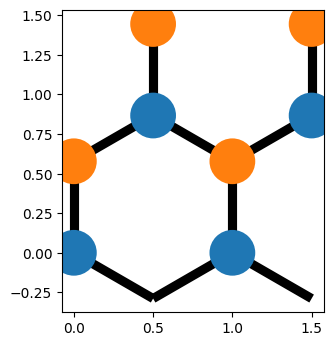

<InfiniteSystem with 10 sites, and 20 hoppings>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

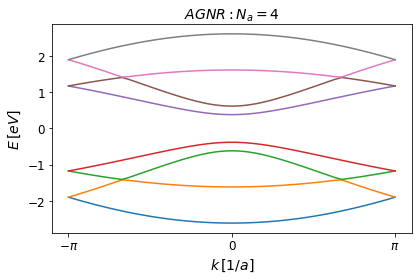

In [168]:
# AGNR 4
armchair_ribbon4 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon4[graphene.shape((lambda pos: 0<=pos[0]<2), (0, 0))] = 0
armchair_ribbon4[graphene.neighbors(1)] = -1
kwant.plot(armchair_ribbon4, dpi=100);
armchair_ribbon4 = armchair_ribbon4.finalized()   
print(armchair_ribbon4)

plt.figure()
axes = plt.gca()
axes.set_title(r'$AGNR: N_a=4$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
plt.xticks([-np.pi, 0, np.pi], ['$-\pi$', '0', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
kwant.plotter.bands(armchair_ribbon4, momenta=k_values, ax=axes);
plt.savefig('AGNR4_H1.png')
files.download('AGNR4_H1.png')

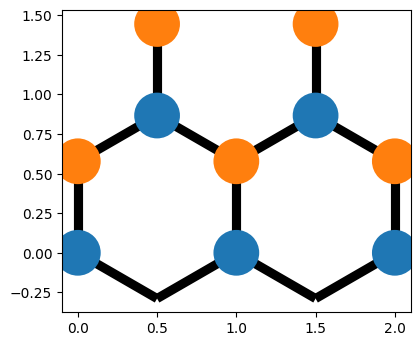

<InfiniteSystem with 12 sites, and 26 hoppings>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

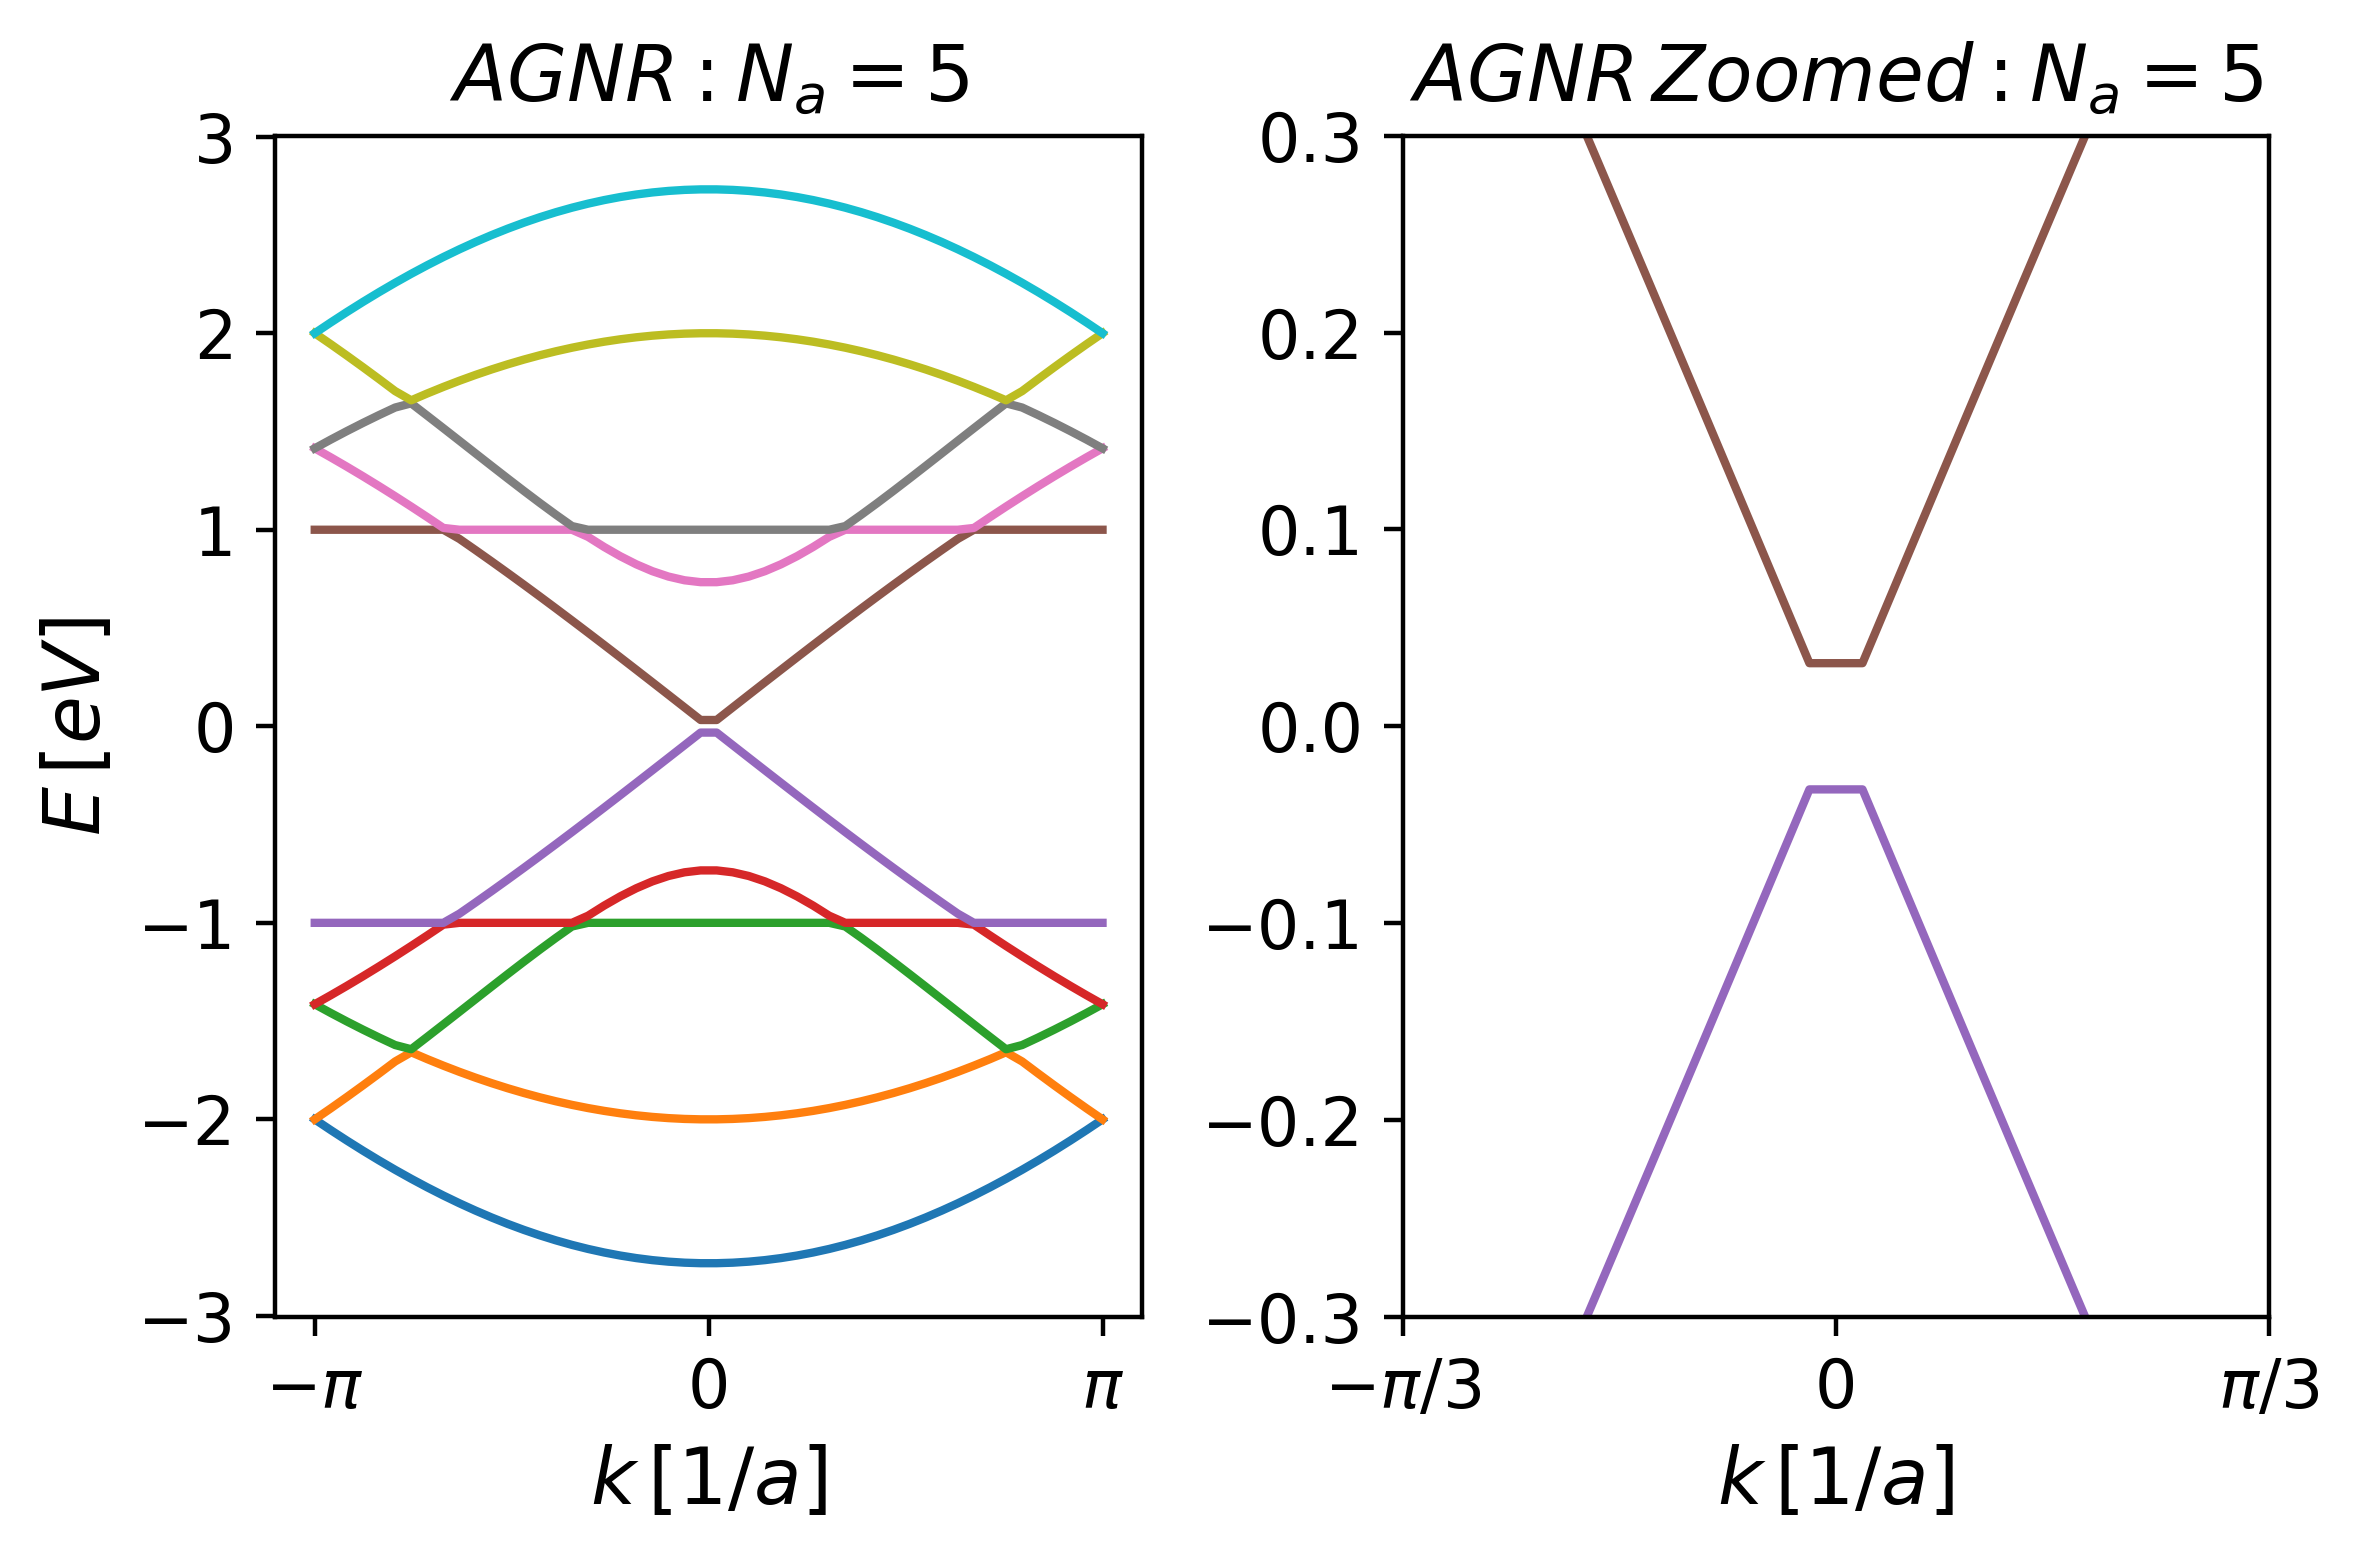

In [169]:
# AGNR 5
armchair_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon5[graphene.shape((lambda pos: 0<=pos[0]<2.5), (0, 0))] = 0
armchair_ribbon5[graphene.neighbors(1)] = -1
kwant.plot(armchair_ribbon5, dpi=100);
armchair_ribbon5 = armchair_ribbon5.finalized()   
print(armchair_ribbon5)

plt.figure(dpi=400,figsize=(6,4))
plt.subplot(121)
axes = plt.gca()
axes.set_title(r'$AGNR: N_a=5$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
plt.xticks([-np.pi, 0, np.pi], ['$-\pi$', '0', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(armchair_ribbon5, momenta=k_values, ax=axes);
plt.tight_layout()

plt.subplot(122)
axes = plt.gca()
axes.set_title(r'$AGNR\,Zoomed: N_a=5$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'', fontsize=14)
axes.set_ylim([-.3,.3])
axes.set_xlim([-np.pi/3,np.pi/3])
plt.xticks([-np.pi/3, 0, np.pi/3], ['$-\pi/3$', '0', '$\pi/3$'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
kwant.plotter.bands(armchair_ribbon5, momenta=k_values, ax=axes);


plt.savefig('AGNR5_H1.png')
files.download('AGNR5_H1.png')

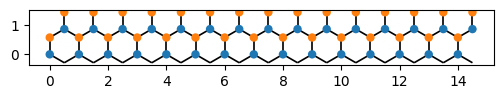

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

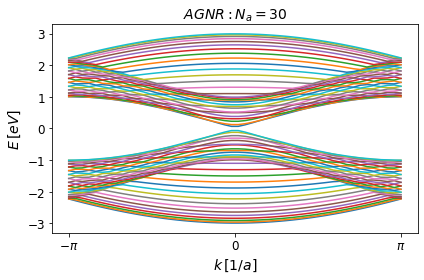

In [170]:
# AGNR 30
armchair_ribbon30 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon30[graphene.shape((lambda pos: 0<=pos[0]<15), (0, 0))] = 0
armchair_ribbon30[graphene.neighbors(1)] = -1
kwant.plot(armchair_ribbon30, dpi=100);
armchair_ribbon30 = armchair_ribbon30.finalized()   

plt.figure()
axes = plt.gca()
axes.set_title(r'$AGNR: N_a=30$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
plt.xticks([-np.pi, 0, np.pi], ['$-\pi$', '0', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
kwant.plotter.bands(armchair_ribbon30, momenta=k_values, ax=axes);
plt.tight_layout()

plt.savefig('AGNR30_H1.png')
files.download('AGNR30_H1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

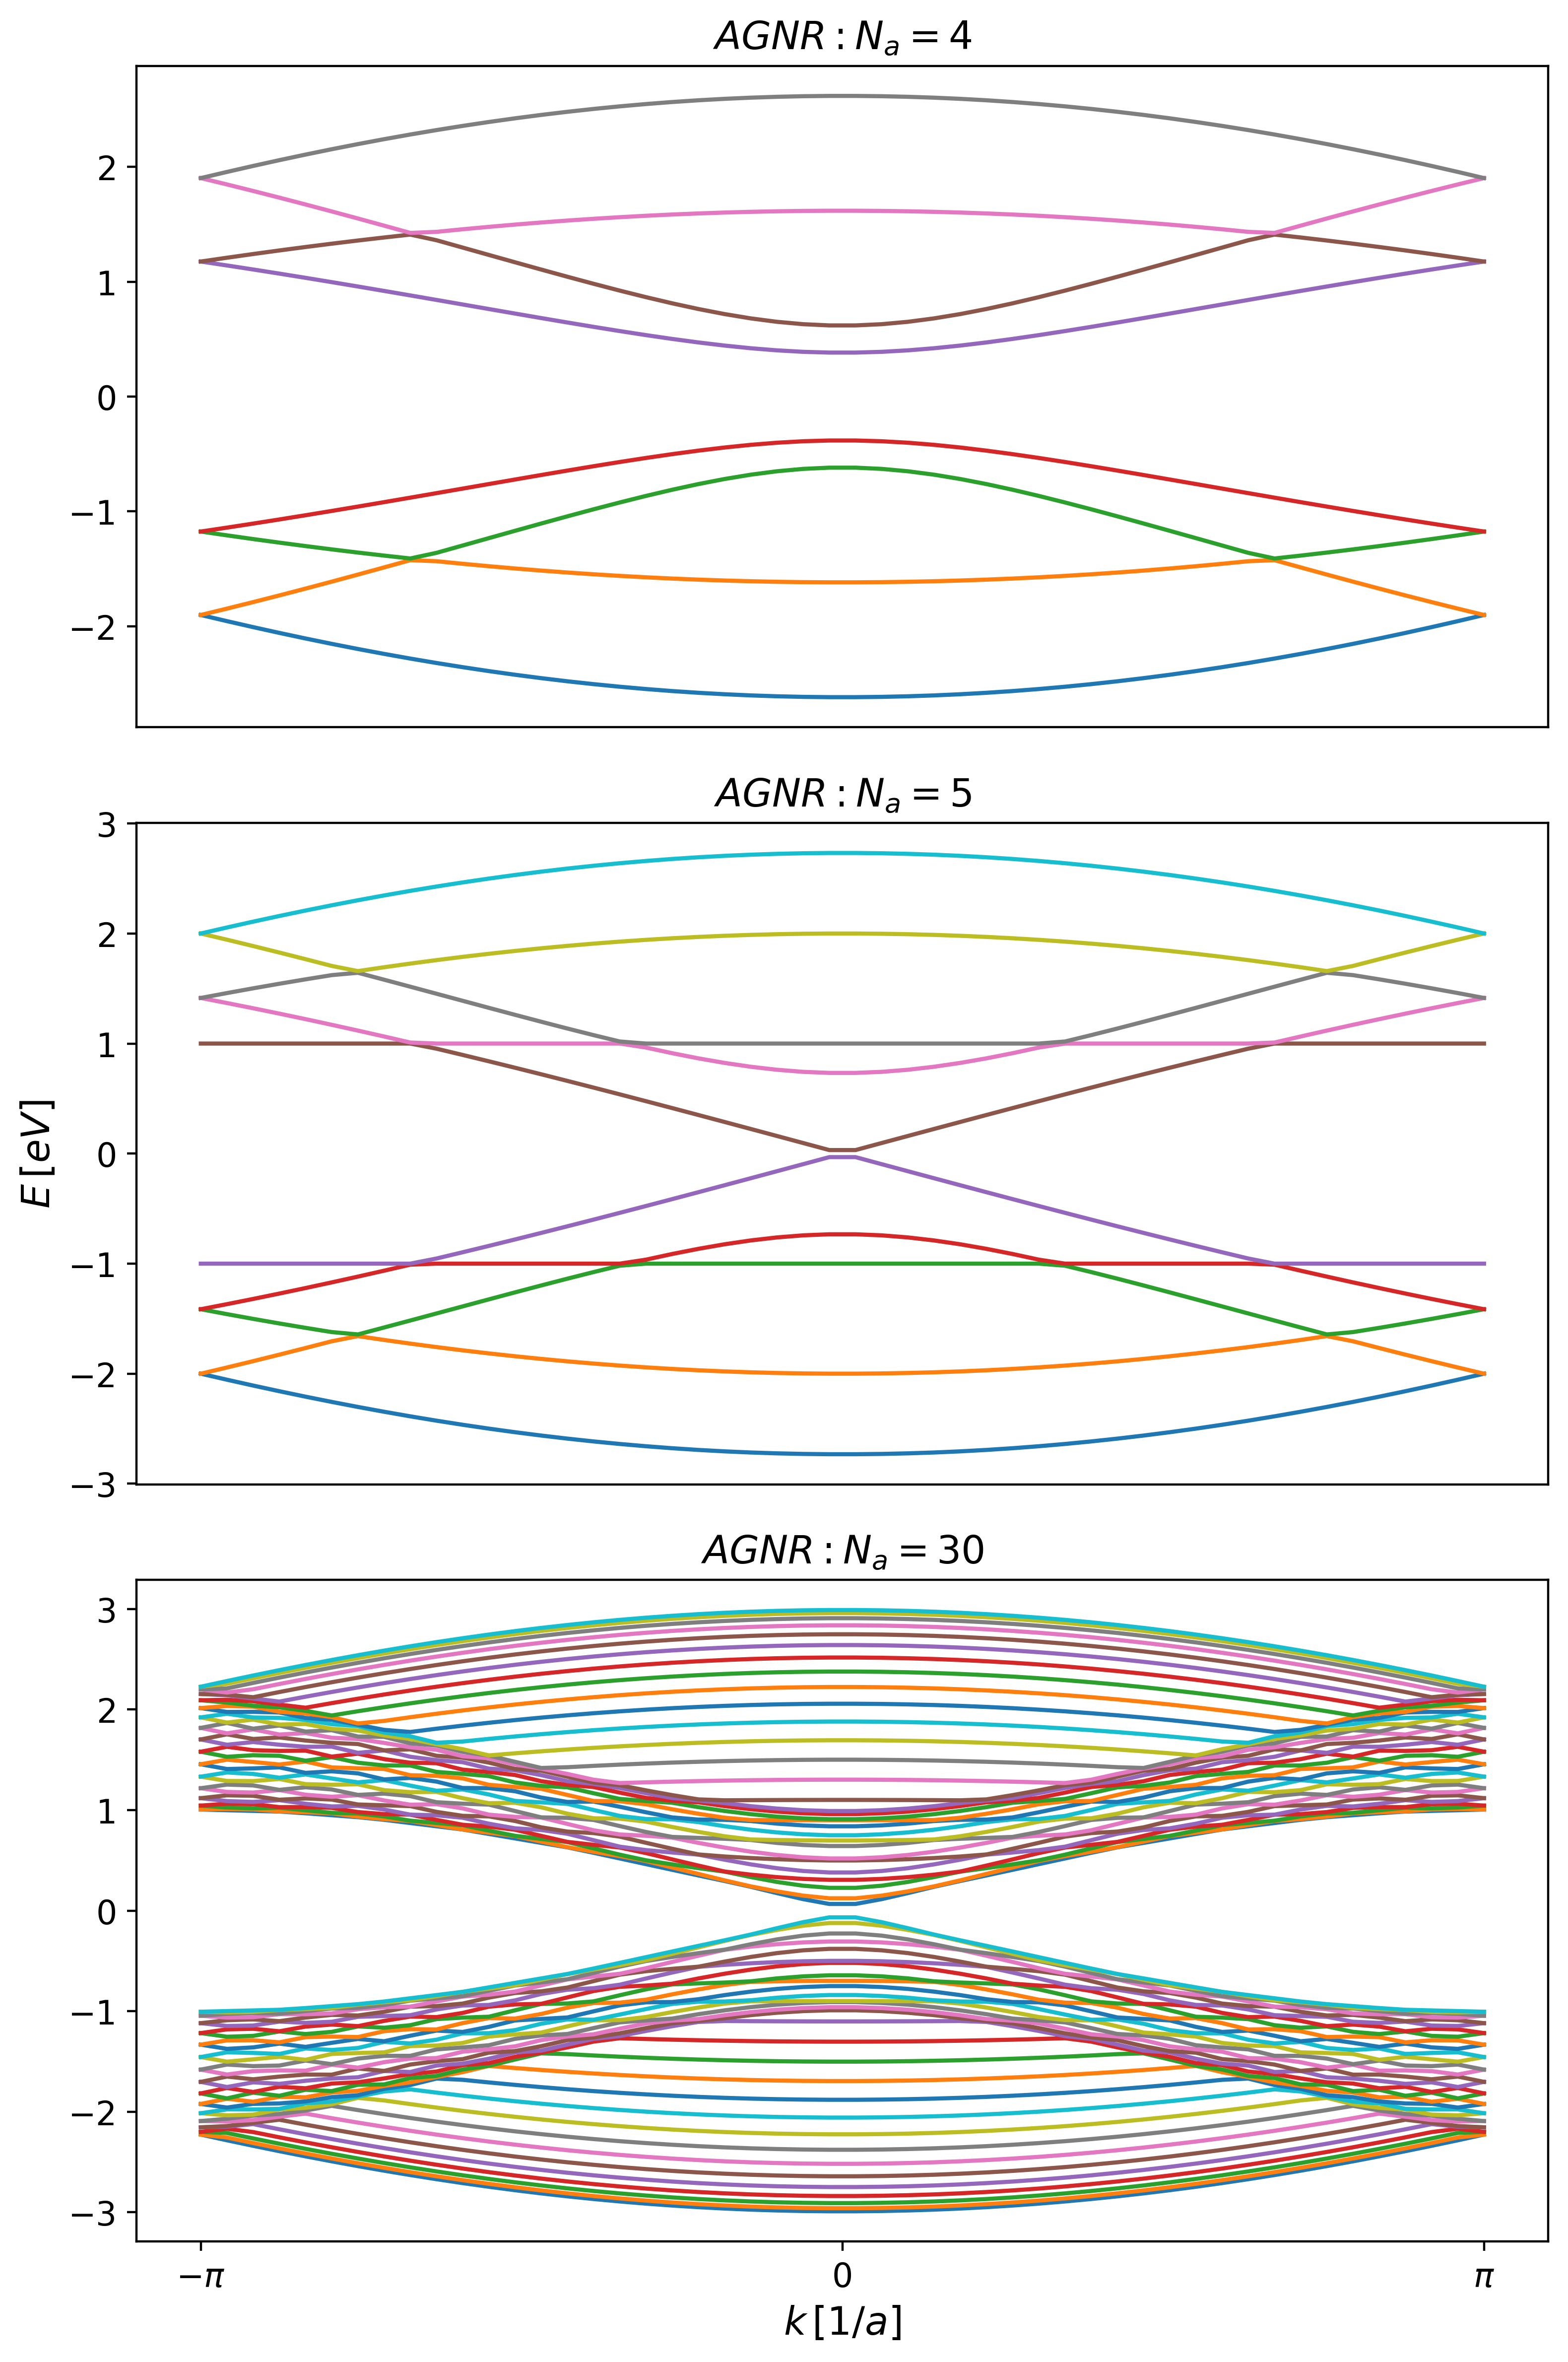

In [171]:
plt.figure(dpi=400,figsize=(8,12))
plt.subplot(311)
axes = plt.gca()
axes.set_title(r'$AGNR: N_a=4$', fontsize=14)
axes.set_xlabel('', fontsize=14)
axes.set_ylabel('', fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=12)
kwant.plotter.bands(armchair_ribbon4, momenta=k_values, ax=axes);
plt.subplot(312)
axes = plt.gca()
axes.set_title(r'$AGNR: N_a=5$', fontsize=14)
axes.set_xlabel('', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=12)
kwant.plotter.bands(armchair_ribbon5, momenta=k_values, ax=axes);
plt.subplot(313)
axes = plt.gca()
axes.set_title(r'$AGNR: N_a=30$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel('', fontsize=14)
plt.xticks([-np.pi, 0, np.pi], ['$-\pi$', '0', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(armchair_ribbon30, momenta=k_values, ax=axes);

plt.tight_layout()
plt.savefig('AGNRs_H1.png')
files.download('AGNRs_H1.png')

## Part II: Subband Structure of Zigzag GNR: N=4,5,30

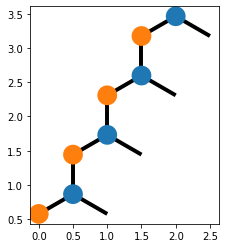

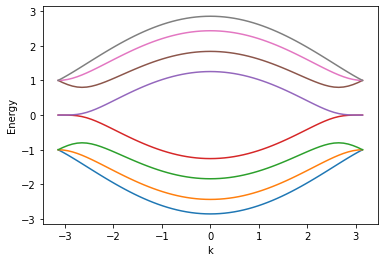

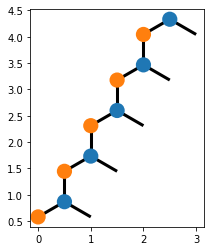

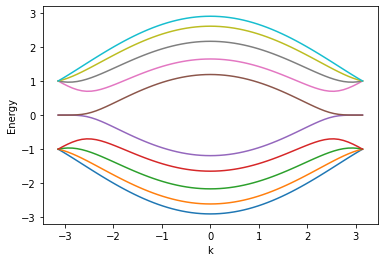

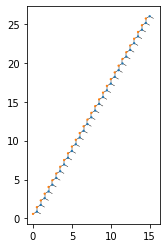

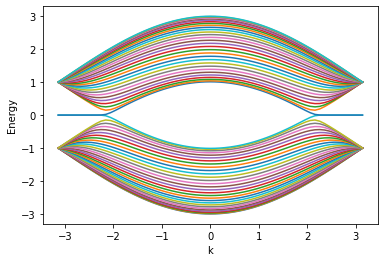

In [172]:
zigzag_ribbon4 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon4[graphene.shape((lambda pos: 0<pos[1]<4), (0, 0))] = 0
zigzag_ribbon4[graphene.neighbors(1)] = 1
kwant.plot(zigzag_ribbon4)
zigzag_ribbon4 = zigzag_ribbon4.finalized()   
kwant.plotter.bands(zigzag_ribbon4);

zigzag_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon5[graphene.shape((lambda pos: 0<pos[1]<4.5), (0, 0))] = 0
zigzag_ribbon5[graphene.neighbors(1)] = 1
kwant.plot(zigzag_ribbon5)
zigzag_ribbon5 = zigzag_ribbon5.finalized() 
kwant.plotter.bands(zigzag_ribbon5);

zigzag_ribbon30 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon30[graphene.shape((lambda pos: 0<pos[1]<26), (0, 0))] = 0
zigzag_ribbon30[graphene.neighbors(1)] = 1
kwant.plot(zigzag_ribbon30)
zigzag_ribbon30 = zigzag_ribbon30.finalized()   
kwant.plotter.bands(zigzag_ribbon30);

#ldos = kwant.ldos(zigzag_ribbon30.finalized(), energy=2.7*10**-3)
#kwant.plotter.map(zigzag_ribbon30.finalized(), ldos, method='nearest', dpi=200, cmap='viridis', oversampling=20);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

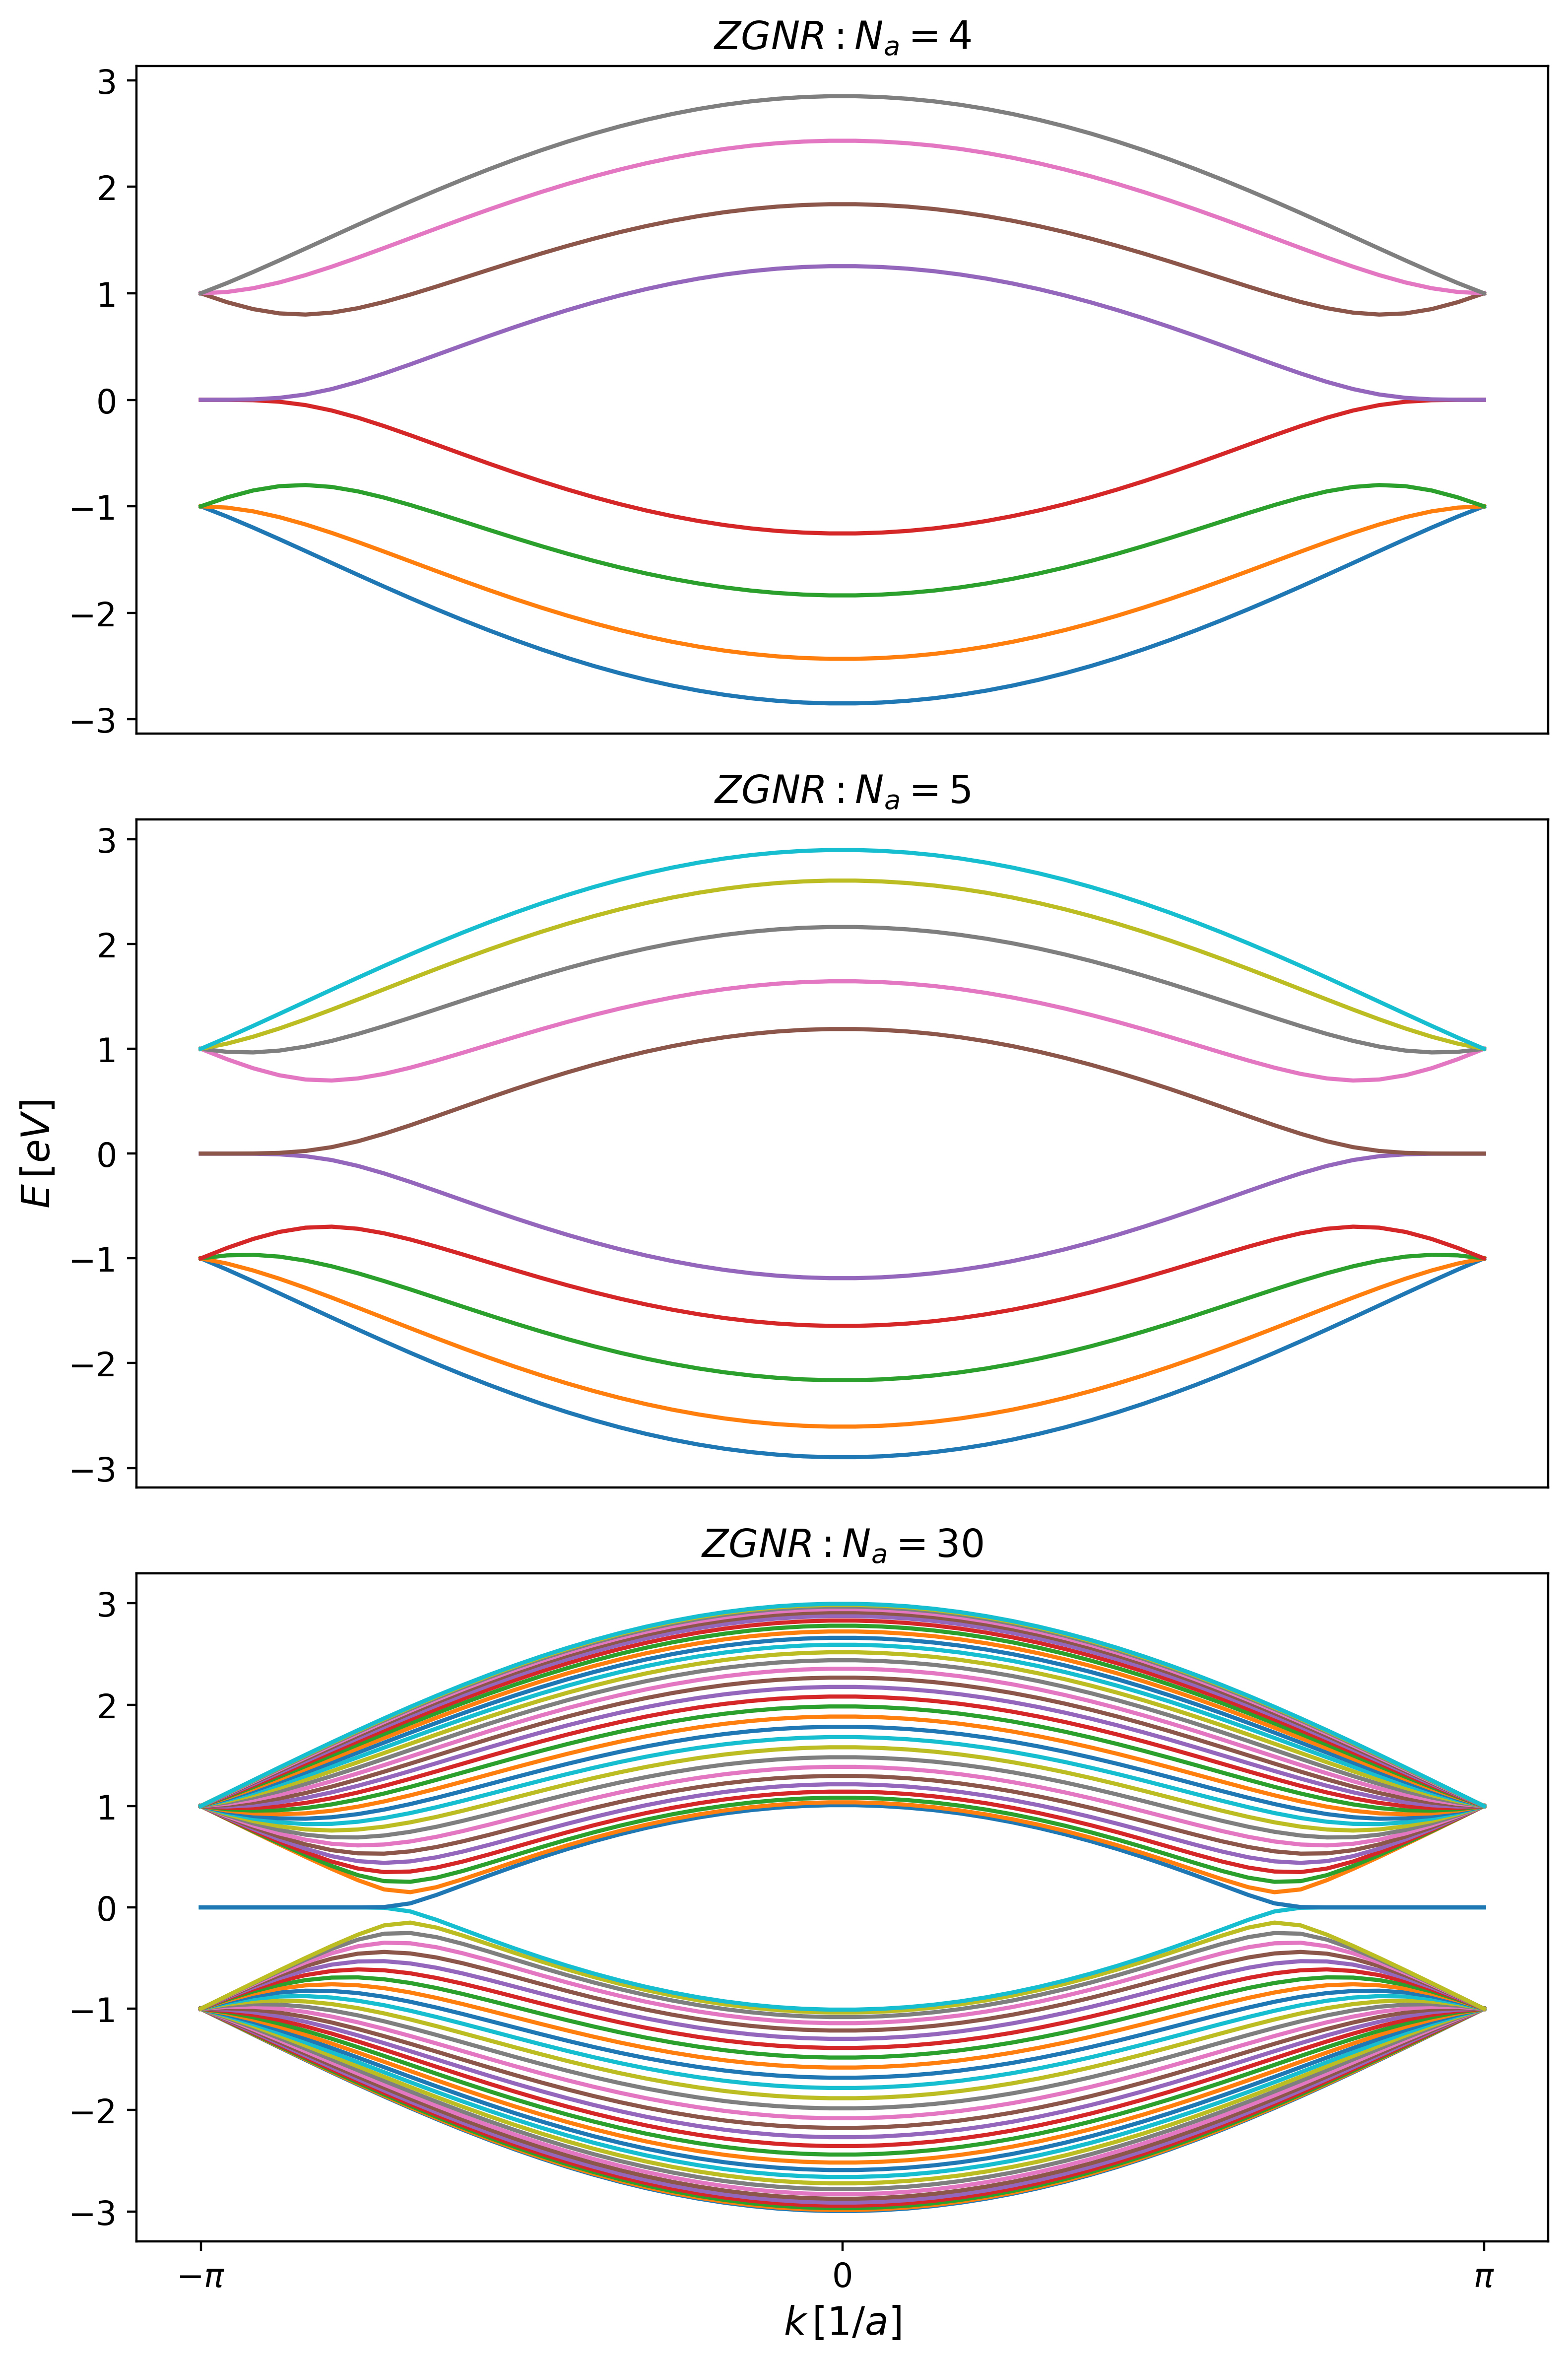

In [173]:
plt.figure(dpi=400,figsize=(8,12))
plt.subplot(311)
axes = plt.gca()
axes.set_title(r'$ZGNR: N_a=4$', fontsize=14)
axes.set_xlabel('', fontsize=14)
axes.set_ylabel('', fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=12)
kwant.plotter.bands(zigzag_ribbon4, momenta=k_values, ax=axes);
plt.subplot(312)
axes = plt.gca()
axes.set_title(r'$ZGNR: N_a=5$', fontsize=14)
axes.set_xlabel('', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=12)
kwant.plotter.bands(zigzag_ribbon5, momenta=k_values, ax=axes);
plt.subplot(313)
axes = plt.gca()
axes.set_title(r'$ZGNR: N_a=30$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel('', fontsize=14)
plt.xticks([-np.pi, 0, np.pi], ['$-\pi$', '0', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(zigzag_ribbon30, momenta=k_values, ax=axes);

plt.tight_layout()
plt.savefig('ZGNRs_H1.png')
files.download('ZGNRs_H1.png')

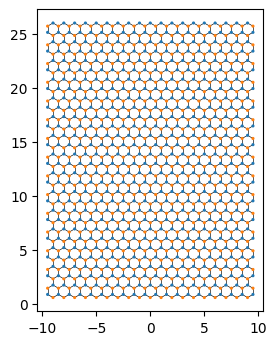

[1. 0.] [0.5       0.8660254]
[0.         1.73205081]


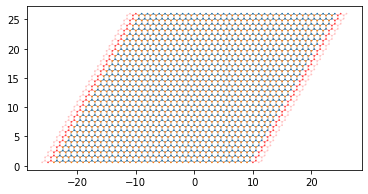

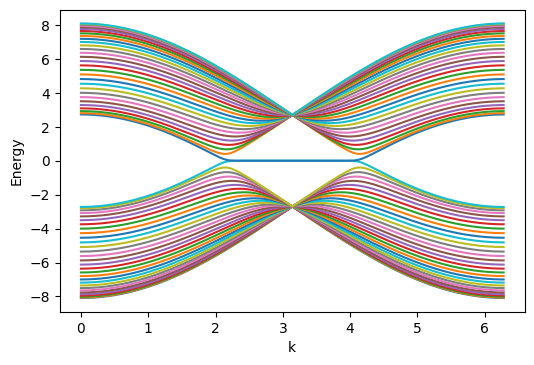

In [174]:
graphene_sys = kwant.Builder()
gr_lat = kwant.lattice.honeycomb(a=1)
def ribbon_sys(pos):
    x, y = pos
    in_x = abs(x) < 10 
    in_y = 0 < y < 26
    return in_x and in_y

def ribbon_lead(pos):
    x, y = pos
    return 0 < y < 26
graphene_sys[gr_lat.shape(ribbon_sys, (0, 0))] = 0.0
graphene_sys[gr_lat.neighbors(1)] = 2.7
kwant.plot(graphene_sys, dpi=100);
a, b = gr_lat.sublattices
v1, v2 = gr_lat.prim_vecs 
print(v1, v2)
print(2*v2-v1)
left_direction = kwant.TranslationalSymmetry(-v1)

left_lead = kwant.Builder(left_direction)

left_lead[gr_lat.shape(ribbon_lead, (0, 0))] = 0
left_lead[gr_lat.neighbors()] = 2.7

graphene_sys.attach_lead(left_lead)
graphene_sys.attach_lead(left_lead.reversed())
kwant.plot(graphene_sys);
left_lead = left_lead.finalized()
k = np.arange(0, 2*np.pi, 0.01)
kwant.plotter.bands(left_lead, momenta=k, dpi=100);

There are 60 sites across the lead,and 2 modes at this energy


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

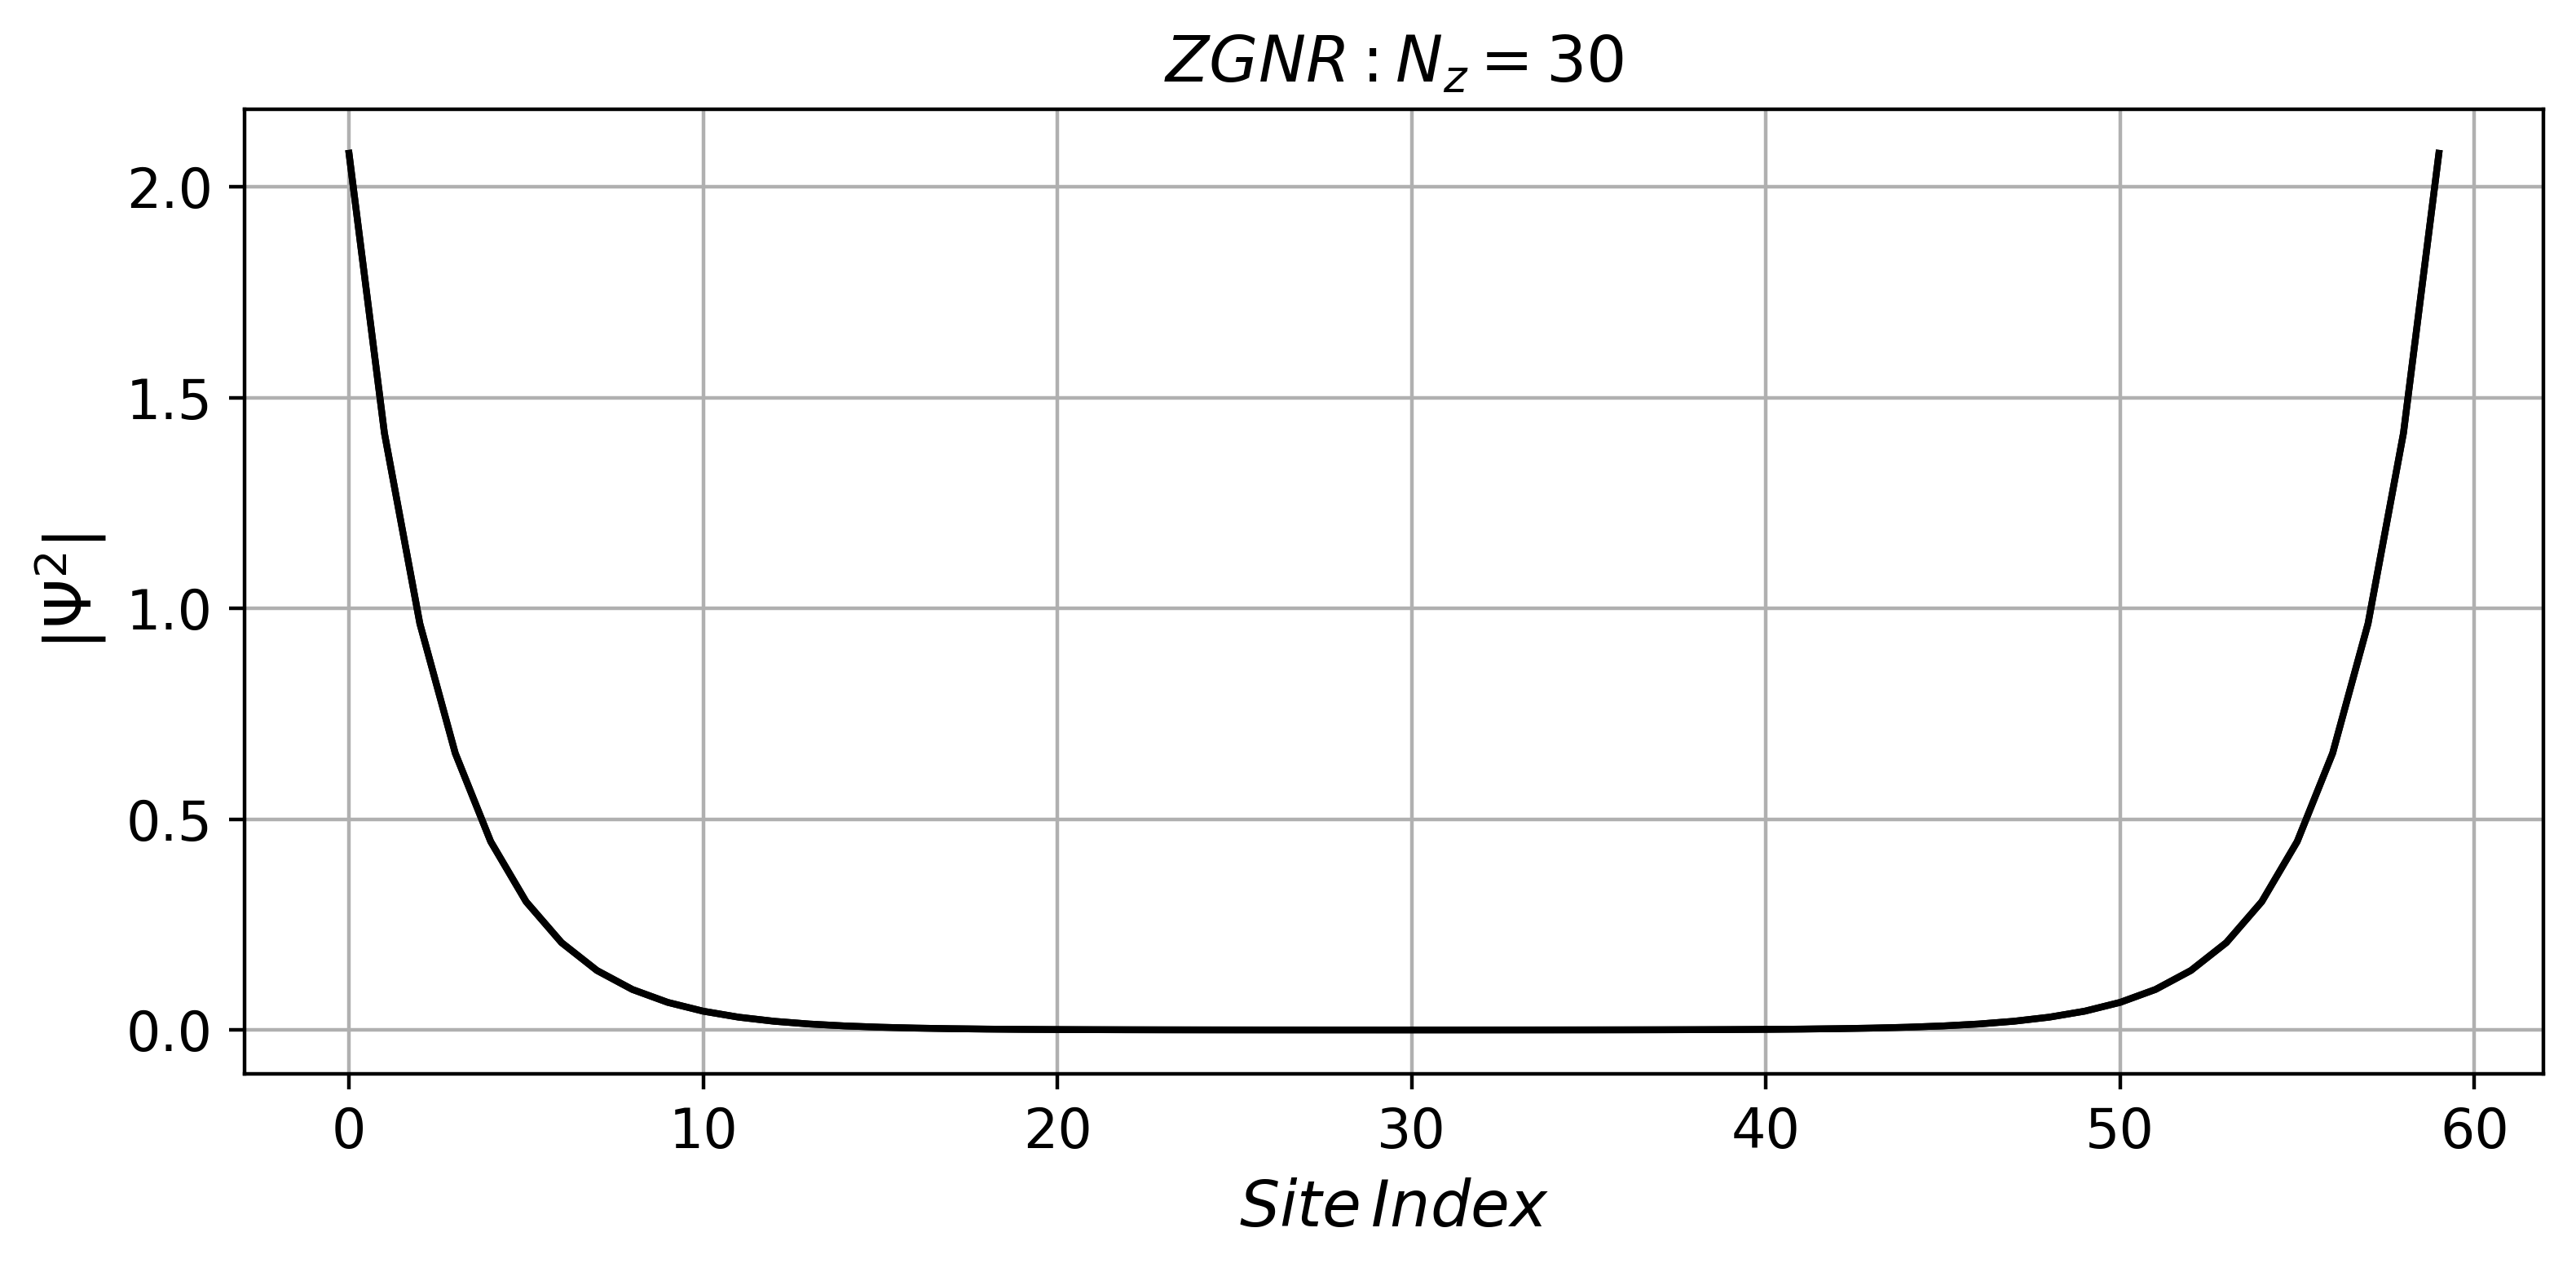

In [175]:
# Get all the modes at the given energy
propagating_modes, stabilized_modes = left_lead.modes(energy=10**(-3)*2.7)
# Get wave functions of the propagating modes 
wf = propagating_modes.wave_functions   

print('There are %d sites across the lead,' 
      'and %d modes at this energy' % (wf.shape[0], 
                                       wf.shape[1]))
# Plot the wave function
import matplotlib.pyplot as plt
mode_index = 0

# Plot the second mode   
plt.figure(dpi=400, figsize=(8, 4));
plt.subplot(111)
plt.xlabel(r'$Site\,Index$', fontsize=14);
plt.ylabel(r'$|\Psi^2|$',fontsize=14);
plt.title(r'$ZGNR:N_z=30$',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(wf*wf.conj(), color='k') 
plt.grid()
plt.tight_layout()
plt.savefig('ZGNR_H1_Prob.png')
files.download('ZGNR_H1_Prob.png')

## Part III: Subband structure of AGNR and ZGNR using third-nearest neighbor hoppings

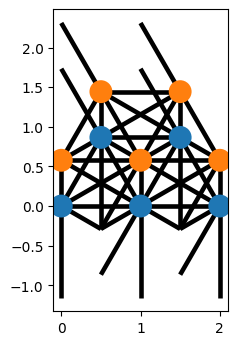

In [176]:
# AGNR N=5
armchair_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon5[graphene.shape((lambda pos: 0<=pos[0]<2.5), (0, 0))] = 0
armchair_ribbon5[graphene.neighbors(1)] = -2.7
armchair_ribbon5[graphene.neighbors(2)] = -.2
armchair_ribbon5[graphene.neighbors(3)] = -.18
kwant.plot(armchair_ribbon5, dpi=100);
armchair_ribbon5 = armchair_ribbon5.finalized()   

k_values = np.linspace(-np.pi, np.pi)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

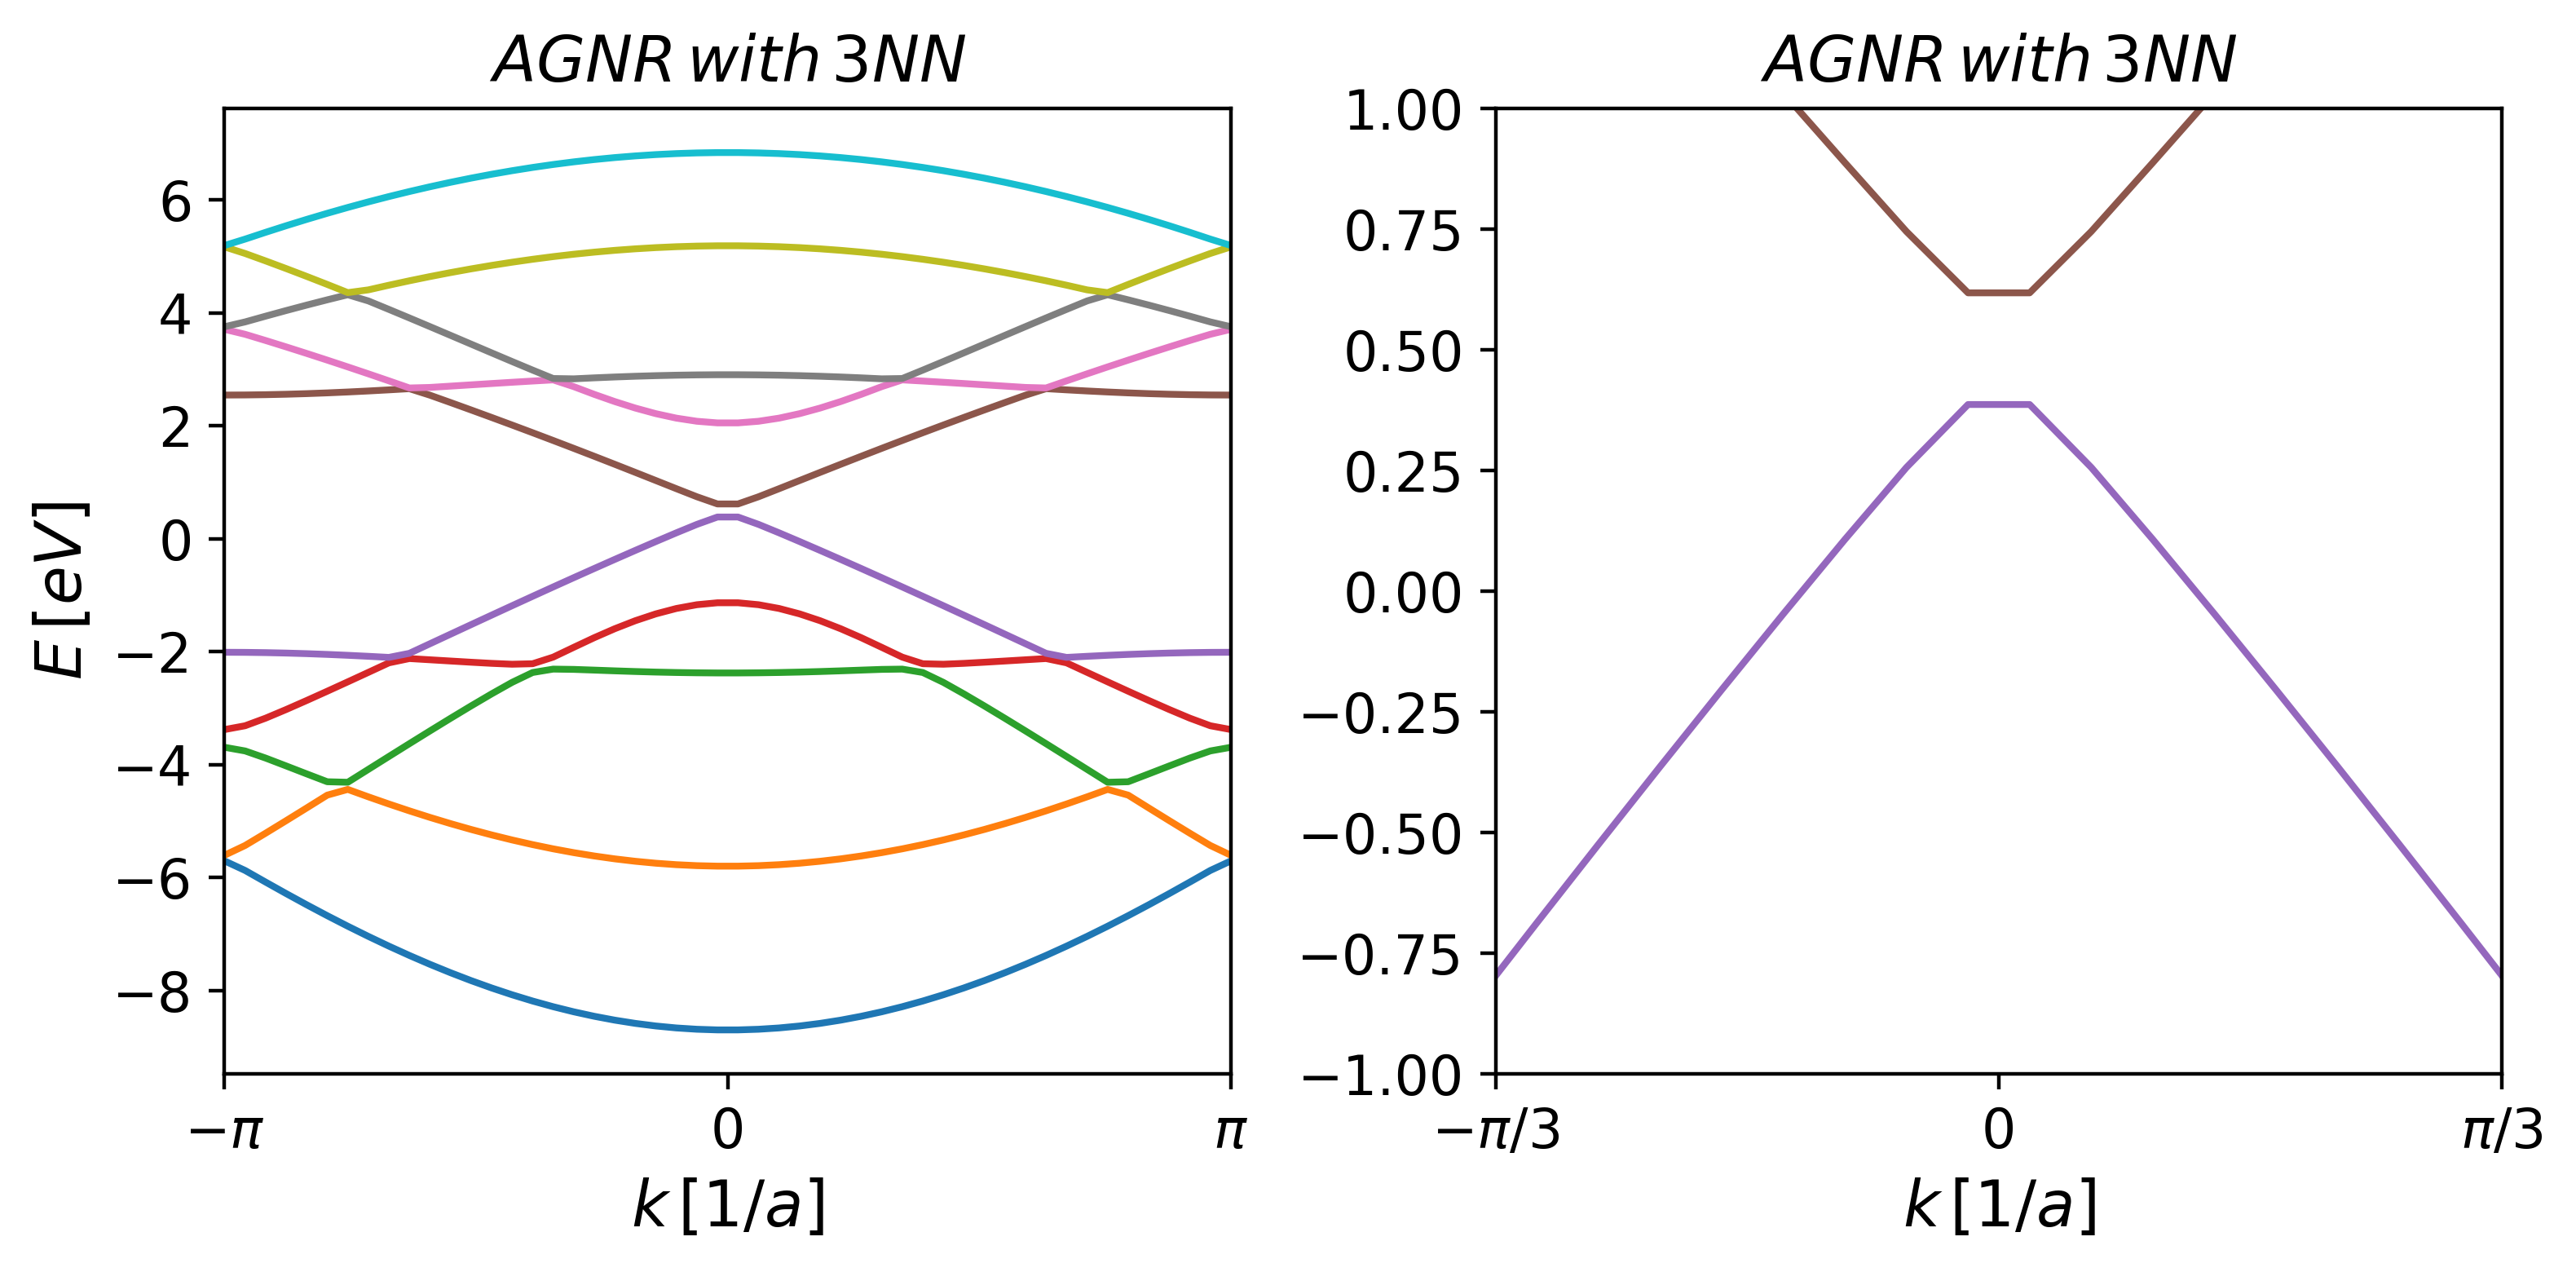

In [177]:
plt.figure(dpi=400,figsize=(8,4))
plt.subplot(121)
axes = plt.gca()
axes.set_title(r'$AGNR\,with\,3NN$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
axes.set_xlim([-np.pi,np.pi])
plt.xticks([-np.pi, 0, np.pi], ['$-\pi$', '0', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(armchair_ribbon5, momenta=k_values, ax=axes);

plt.subplot(122)
axes = plt.gca()
axes.set_title(r'$AGNR\,with\,3NN$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel('')
axes.set_ylim([-1,1])
axes.set_xlim([-np.pi/3,np.pi/3])
plt.xticks([-np.pi/3, 0, np.pi/3], ['$-\pi/3$', '0', '$\pi/3$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(armchair_ribbon5, momenta=k_values, ax=axes);
plt.tight_layout()
plt.savefig('AGNR_H3.png')
files.download('AGNR_H3.png')

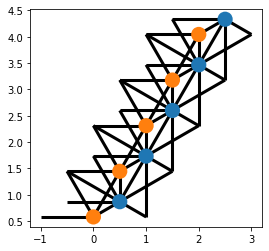

In [178]:
# ZGNR N=5
zigzag_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon5[graphene.shape((lambda pos: 0<pos[1]<4.5), (0, 0))] = 0
zigzag_ribbon5[graphene.neighbors(1)] = -2.7
zigzag_ribbon5[graphene.neighbors(2)] = -.2
zigzag_ribbon5[graphene.neighbors(3)] = -.18
kwant.plot(zigzag_ribbon5)
zigzag_ribbon5 = zigzag_ribbon5.finalized()   
k_values = np.linspace(-np.pi, np.pi)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

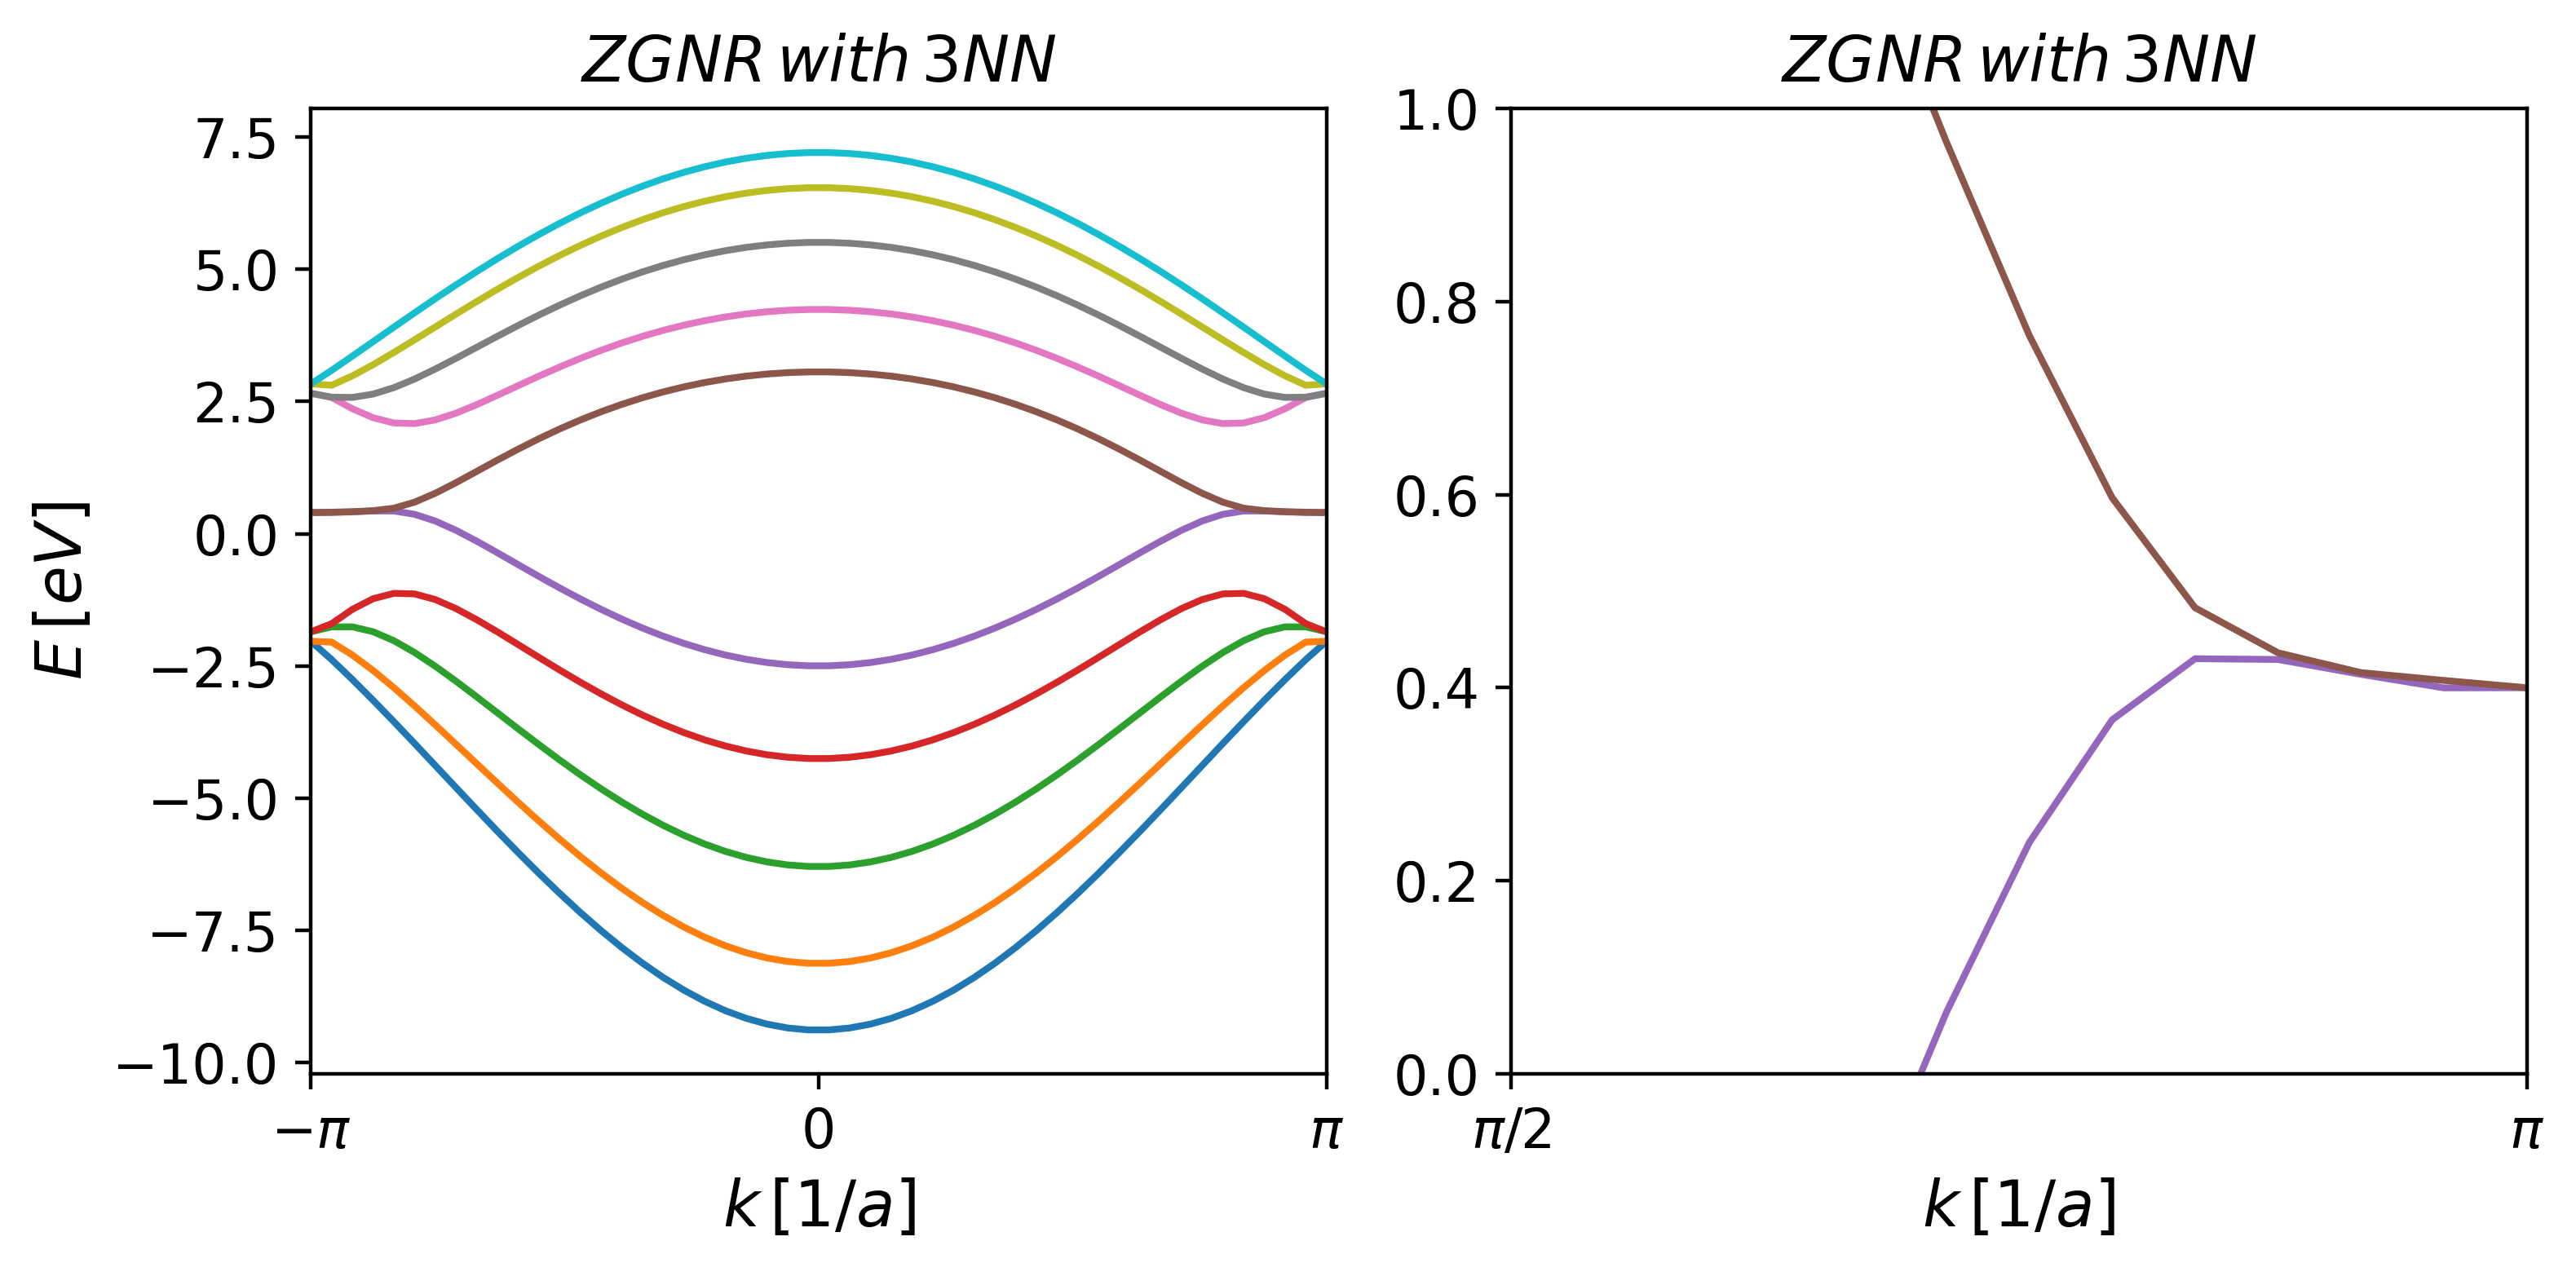

In [179]:
plt.figure(dpi=400, figsize=(8,4))
plt.subplot(121)
axes = plt.gca()
axes.set_title(r'$ZGNR\,with\,3NN$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
axes.set_xlim([-np.pi,np.pi])
plt.xticks([-np.pi, 0, np.pi], ['$-\pi$', '0', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(zigzag_ribbon5, momenta=k_values, ax=axes);

plt.subplot(122)
axes = plt.gca()
axes.set_title(r'$ZGNR\,with\,3NN$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel('')
axes.set_ylim([0, 1])
axes.set_xlim([np.pi/2, np.pi])
plt.xticks([np.pi/2, np.pi], ['$\pi/2$', '$\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(zigzag_ribbon5, momenta=k_values, ax=axes);
plt.tight_layout()
plt.savefig('ZGNR_H3.png')
files.download('ZGNR_H3.png')

## Part IV: Subband structure of GNRs with spin-orbit coupling as topological insulator below 0.5 K

In [180]:
# define spin matrices
sigma0 = np.array([[1., 0.], [0., 1.]])
sigmax = np.array([[0., 1.], [1., 0.]])
sigmay = np.array([[0., -1j], [1j, 0.]])
sigmaz = np.array([[1., 0.], [0., -1.]])
t=1

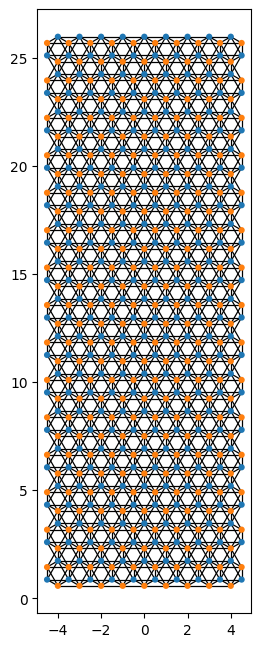

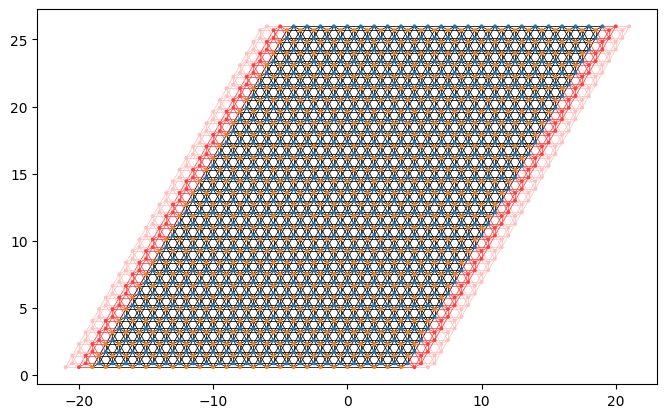

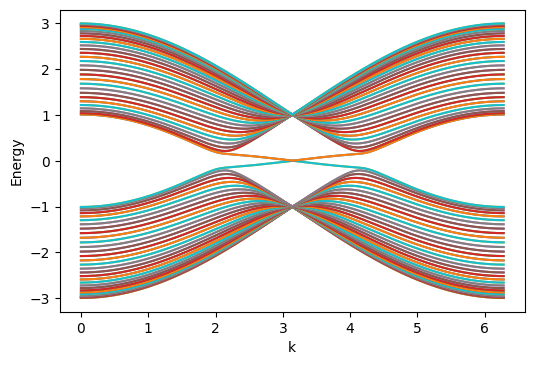

In [181]:
def ribbon_sys(pos):
    x, y = pos
    in_x = abs(x) < 5 
    in_y = 0 < y < 26
    return in_x and in_y
def ribbon_lead(pos):
    x, y = pos
    return 0 < y < 26

graphene_sys = kwant.Builder()
gr_lat = kwant.lattice.honeycomb()
a, b = gr_lat.sublattices
v1, v2 = gr_lat.prim_vecs 

# create graphene shape
graphene_sys[gr_lat.shape(ribbon_sys, (0, 0))] = ([[0,0],[0,0]])
# set neighbors
graphene_sys[graphene.neighbors(1)] = -t*sigma0
graphene_sys[HoppingKind((0, 1), a, a)] = t*0.03*1j*sigmaz    
graphene_sys[HoppingKind((-1, 1), a, a)] = -t*0.03*1j*sigmaz     
graphene_sys[HoppingKind((1, 0), a, a)] = -t*0.03*1j*sigmaz     
graphene_sys[HoppingKind((0, 1), b, b)] = -t*0.03*1j*sigmaz     
graphene_sys[HoppingKind((-1, 1), b, b)] = t*0.03*1j*sigmaz     
graphene_sys[HoppingKind((1, 0), b, b)] = t*0.03*1j*sigmaz 
# plot dots
kwant.plot(graphene_sys, fig_size=(8,8), dpi=100);
##################################
left_direction = kwant.TranslationalSymmetry(-v1)
left_lead = kwant.Builder(left_direction)
# create leads shape
left_lead[gr_lat.shape(ribbon_lead, (0, 0))] = ([[0,0],[0,0]])
# set neighbors
left_lead[graphene.neighbors(1)] = -t*sigma0
left_lead[HoppingKind((0, 1), a, a)] = t*0.03*1j*sigmaz    
left_lead[HoppingKind((-1, 1), a, a)] = -t*0.03*1j*sigmaz     
left_lead[HoppingKind((1, 0), a, a)] = -t*0.03*1j*sigmaz     
left_lead[HoppingKind((0, 1), b, b)] = -t*0.03*1j*sigmaz     
left_lead[HoppingKind((-1, 1), b, b)] = t*0.03*1j*sigmaz     
left_lead[HoppingKind((1, 0), b, b)] = t*0.03*1j*sigmaz 
# attach leads
graphene_sys.attach_lead(left_lead)
graphene_sys.attach_lead(left_lead.reversed())
# plot dots
kwant.plot(graphene_sys, fig_size=(8,8), dpi=100);
# finalize
left_lead = left_lead.finalized()
graphene_sys = graphene_sys.finalized()
# plot band-structure
k = np.arange(0, 2*np.pi, 0.01)
kwant.plotter.bands(left_lead, momenta=k, dpi=100);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

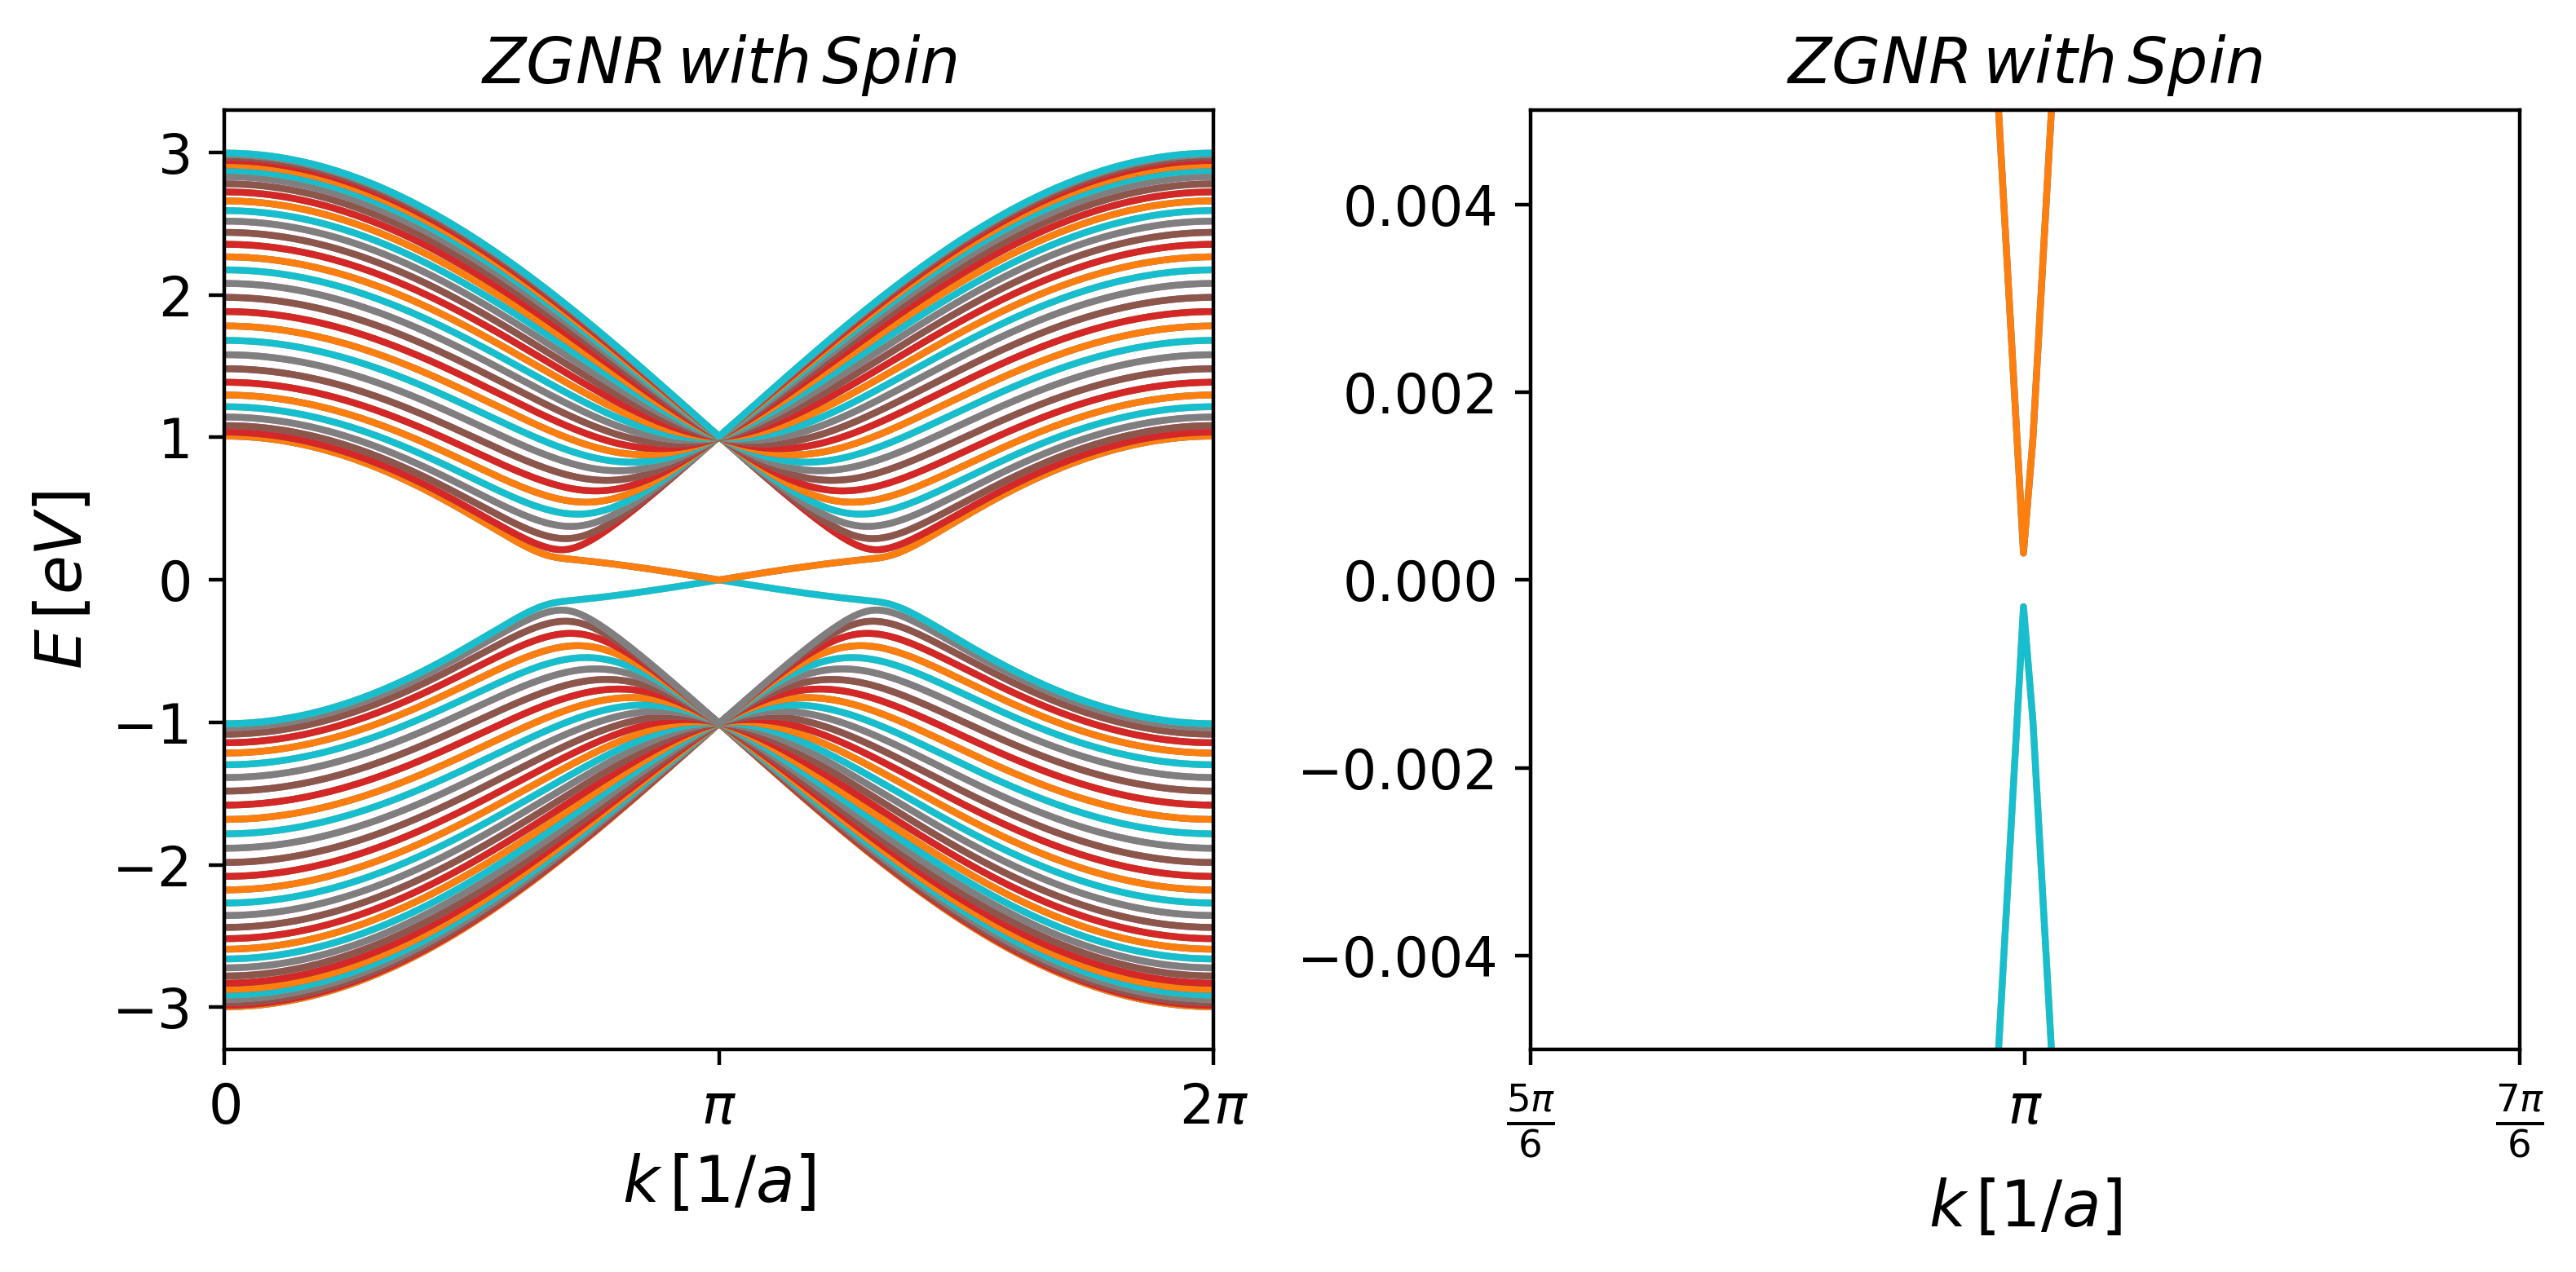

In [182]:
#k = np.arange(0, 2*np.pi, 0.01) # momentum values in 1st Brillouin Zone

plt.figure(dpi=400,figsize=(8,4))

plt.subplot(121)
axes = plt.gca()
axes.set_title(r'$ZGNR\,with\,Spin$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
axes.set_xlim([0,2*np.pi])
plt.xticks([0, np.pi, 2*np.pi], ['$0$', '$\pi$', '$2\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(left_lead, momenta=k, dpi=100,  ax=axes);

plt.subplot(122)
axes = plt.gca()
axes.set_title(r'$ZGNR\,with\,Spin$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel('', fontsize=14)
axes.set_ylim([-.005,.005])
axes.set_xlim([5*np.pi/6,7*np.pi/6])
plt.xticks([5*np.pi/6, np.pi, 7*np.pi/6], [r'$\frac{5\pi}{6}$', r'$\pi$', r'$\frac{7\pi}{6}$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(left_lead, momenta=k, dpi=100,  ax=axes);
plt.tight_layout()
plt.savefig('ZGNR_Spin.png')
files.download('ZGNR_Spin.png')

<Figure size 432x288 with 0 Axes>

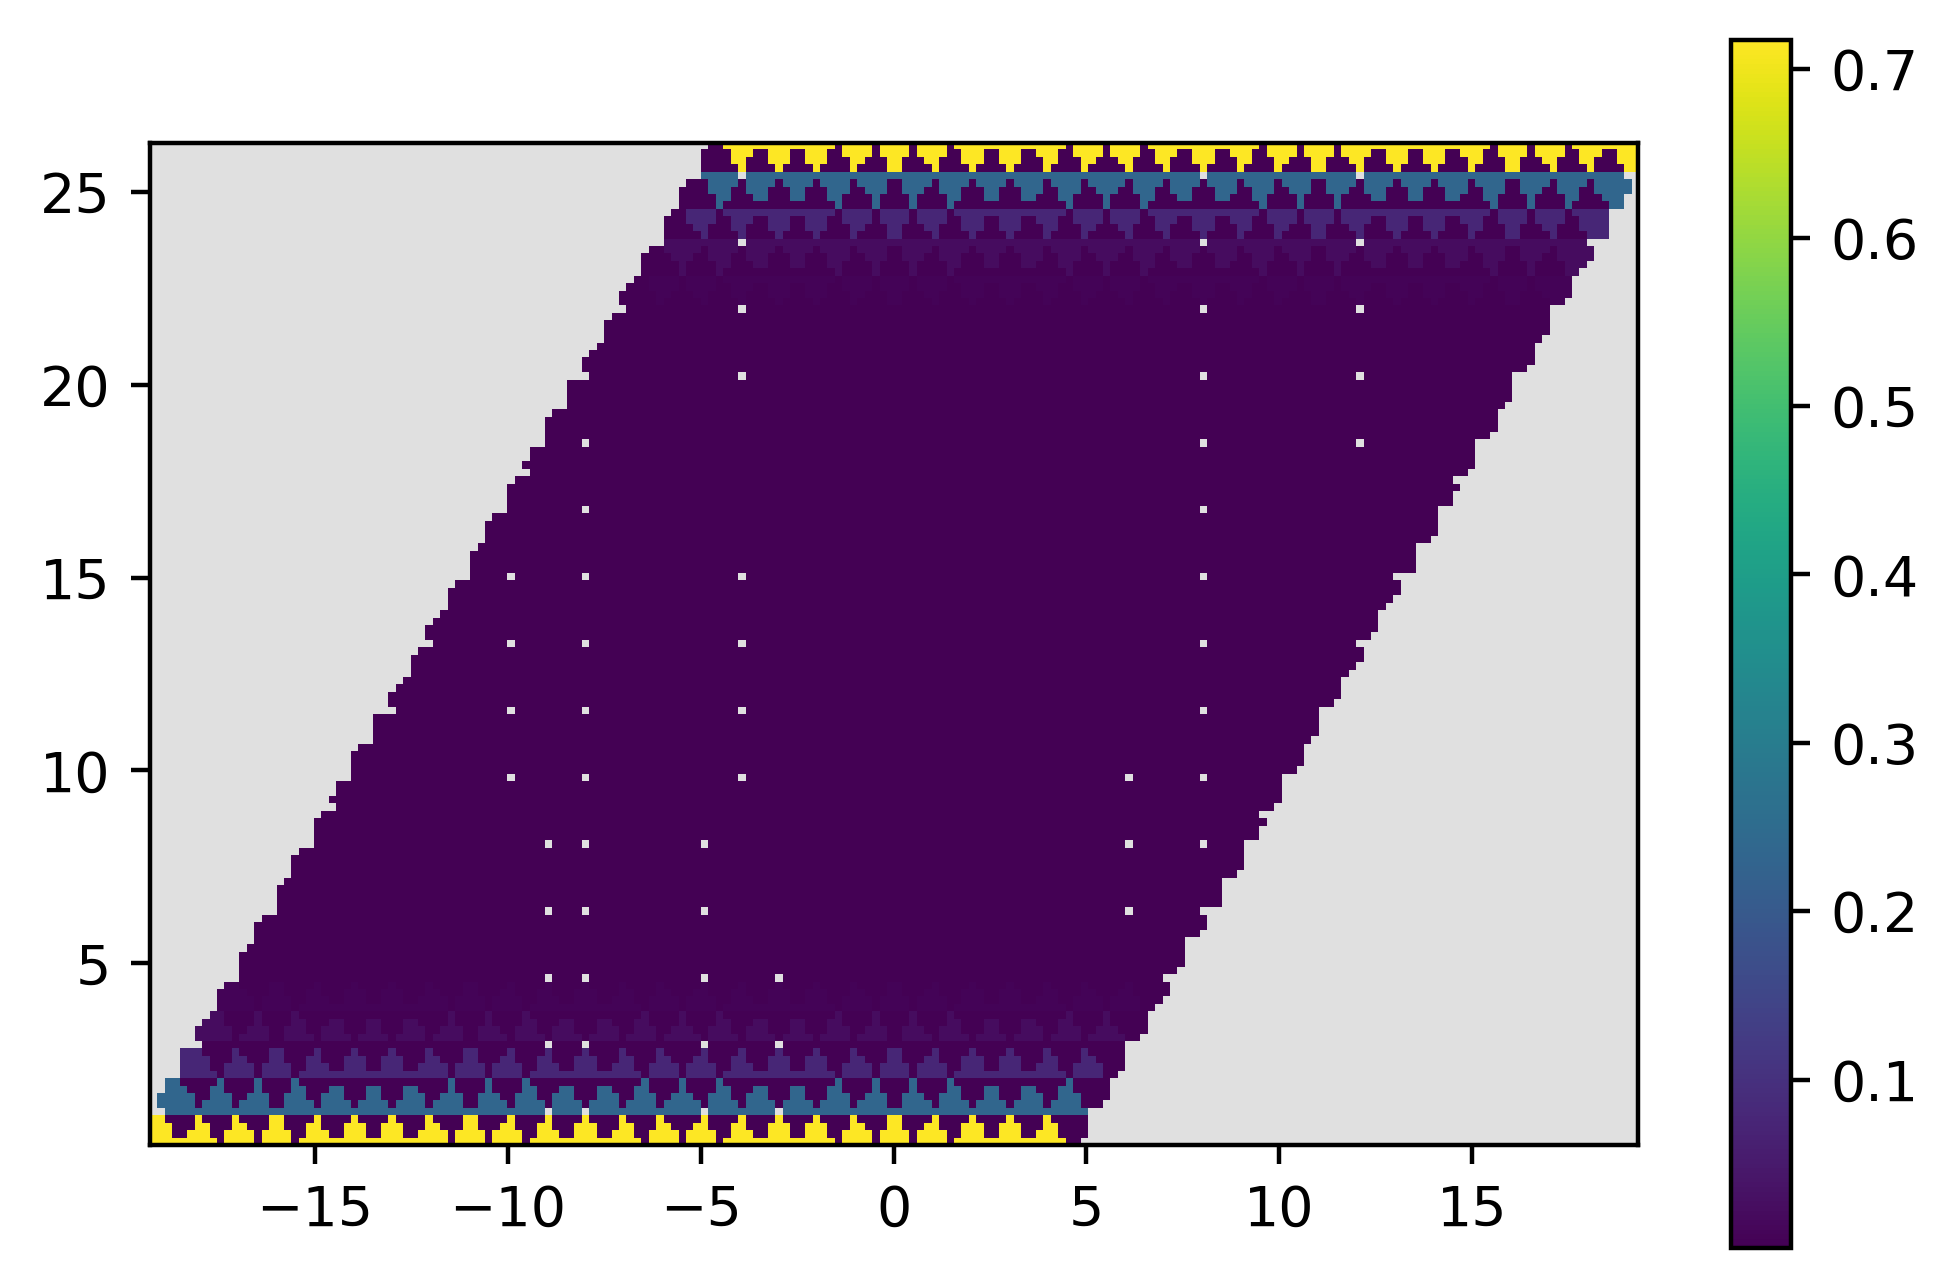

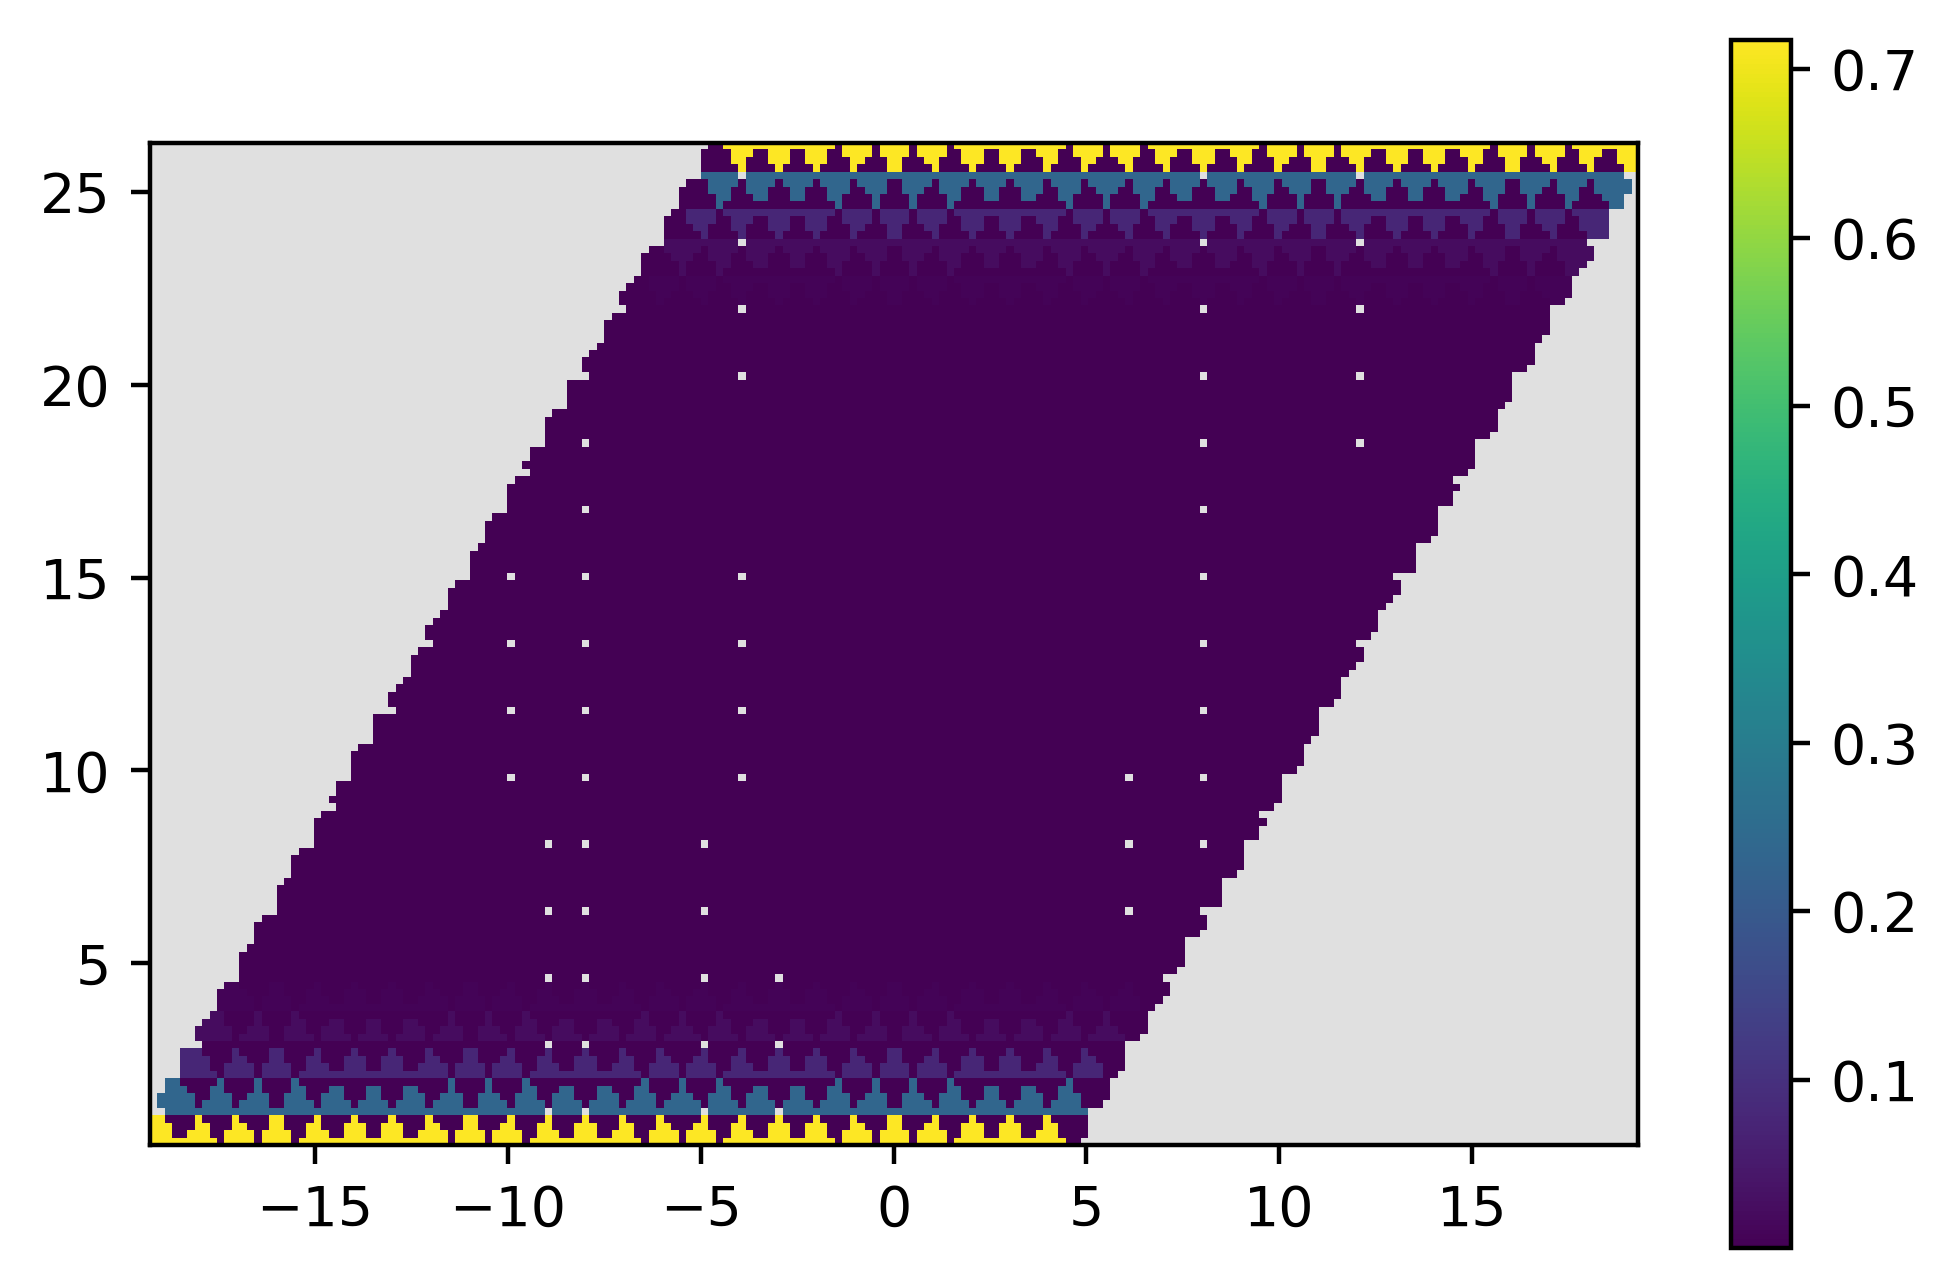

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [166]:
ldos = kwant.ldos(graphene_sys, energy=1.e-1) # ldos contains states for both spins 
spinUp = ldos[0::2]; # Separate even elements of ldos spin up
spinDown = ldos[1::2]; # Separate odd elements of ldos spin down
plt.figure()
kwant.plotter.map(graphene_sys, spinUp, method='nearest', dpi=400, cmap='viridis'); #, oversampling=20, ax=axes
kwant.plotter.map(graphene_sys, spinDown, method='nearest', dpi=400, cmap='viridis'); #, oversampling=20, ax=axes
plt.savefig('ZGNR_spin_ldos.png')
files.download('ZGNR_spin_ldos.png')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


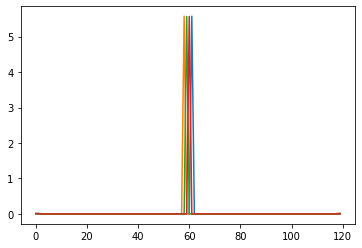

In [160]:
propagating_modes, stabilized_modes = left_lead.modes(energy=10**(-6))
psi = propagating_modes.wave_functions 
psiSquared = psi*psi.conj()

plt.figure(1)
plt.plot(psiSquared);

## Part V: Subband structure of nanowires carved from graphene/WSe2 van der Waals heterostructure

In [183]:
def ribbon_sys(pos):
    x, y = pos
    in_x = abs(x) < 5 
    in_y = 0 < y < 26
    return in_x and in_y
def ribbon_lead(pos):
    x, y = pos
    return 0 < y < 26

In [184]:
t = 2.507;
delta = 0.54*10**(-3);
lamdaA = -1.22*10**(-3);
lamdaB = 1.16*10**(-3);
lamdaR = 0.56*10**(-3);
lamdaA_PIA = -2.69*10**(-3);
lamdaB_PIA = -2.54*10**(-3);

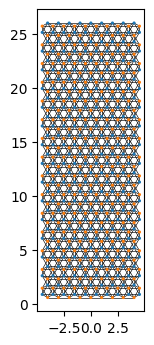

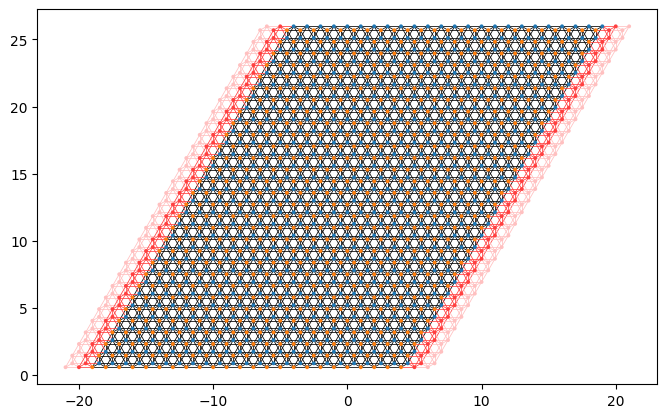

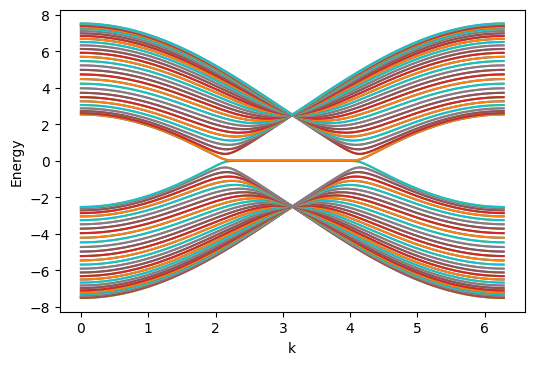

In [185]:
WSe2_sys = kwant.Builder()
gr_lat = kwant.lattice.honeycomb()
a, b = gr_lat.sublattices

# create WSe2 shape
WSe2_sys[a.shape(ribbon_sys, (0, 1))] = delta*sigma0
WSe2_sys[b.shape(ribbon_sys, (0, 1))] = -delta*sigma0 
# set neighbors
WSe2_sys[gr_lat.neighbors()] = t*sigma0

WSe2_sys[kwant.HoppingKind((0,0),b,a)] = t*sigma0+(2j/3)*lamdaR*sigmax/np.sqrt(3); 
WSe2_sys[kwant.HoppingKind((1,-1),b,a)] = t*sigma0+(2j/3)*lamdaR*(-sigmax/(2*np.sqrt(3))-sigmay/2); 
WSe2_sys[kwant.HoppingKind((0,-1),b,a)] = t*sigma0+(2j/3)*lamdaR*(-sigmax/(2*np.sqrt(3))+sigmay/2); 

# Add NNN hopping for PIA terms
WSe2_sys[kwant.HoppingKind((0,1),a,a)] = (1j/3)*(lamdaA*sigmaz/np.sqrt(3) + 2*lamdaA_PIA*(-sigmay));
WSe2_sys[kwant.HoppingKind((1,0),a,a)] = (1j/3)*(-lamdaA*sigmaz/np.sqrt(3) + 2*lamdaA_PIA*(np.sqrt(3)*sigmax/2-sigmay/2));
WSe2_sys[kwant.HoppingKind((1,-1),a,a)] = (1j/3)*(lamdaA*sigmaz/np.sqrt(3) + 2*lamdaA_PIA*(-np.sqrt(3)*sigmax/2-sigmay/2));
WSe2_sys[kwant.HoppingKind((0,1),b,b)] = (1j/3)*(lamdaB*sigmaz/np.sqrt(3) + 2*lamdaB_PIA*(-sigmay));
WSe2_sys[kwant.HoppingKind((1,0),b,b)] = (1j/3)*(-lamdaB*sigmaz/np.sqrt(3) + 2*lamdaB_PIA*(np.sqrt(3)*sigmax/2-sigmay/2));
WSe2_sys[kwant.HoppingKind((1,-1),b,b)] = (1j/3)*(lamdaB*sigmaz/np.sqrt(3) + 2*lamdaB_PIA*(-np.sqrt(3)*sigmax/2-sigmay/2));
# plot dots
kwant.plot(WSe2_sys,dpi=100);
##################################
left_lead = kwant.Builder(left_direction);
# create lead shape
left_lead[a.shape(ribbon_lead, (0, 1))] = delta*sigma0
left_lead[b.shape(ribbon_lead, (0, 1))] = -delta*sigma0
# set neighbors
left_lead[gr_lat.neighbors()] = t*sigma0

left_lead[kwant.HoppingKind((0,0),b,a)] = t*sigma0+(2j/3)*lamdaR*sigmax/np.sqrt(3); 
left_lead[kwant.HoppingKind((1,-1),b,a)] = t*sigma0+(2j/3)*lamdaR*(-sigmax/(2*np.sqrt(3))-sigmay/2); 
left_lead[kwant.HoppingKind((0,-1),b,a)] = t*sigma0+(2j/3)*lamdaR*(-sigmax/(2*np.sqrt(3))+sigmay/2); 

# Add NNN hopping for PIA terms
left_lead[kwant.HoppingKind((0,1),a,a)] = (1j/3)*(lamdaA*sigmaz/np.sqrt(3) + 2*lamdaA_PIA*(-sigmay));
left_lead[kwant.HoppingKind((1,0),a,a)] = (1j/3)*(-lamdaA*sigmaz/np.sqrt(3) + 2*lamdaA_PIA*(np.sqrt(3)*sigmax/2-sigmay/2));
left_lead[kwant.HoppingKind((1,-1),a,a)] = (1j/3)*(lamdaA*sigmaz/np.sqrt(3) + 2*lamdaA_PIA*(-np.sqrt(3)*sigmax/2-sigmay/2));
left_lead[kwant.HoppingKind((0,1),b,b)] = (1j/3)*(lamdaB*sigmaz/np.sqrt(3) + 2*lamdaB_PIA*(-sigmay));
left_lead[kwant.HoppingKind((1,0),b,b)] = (1j/3)*(-lamdaB*sigmaz/np.sqrt(3) + 2*lamdaB_PIA*(np.sqrt(3)*sigmax/2-sigmay/2));
left_lead[kwant.HoppingKind((1,-1),b,b)] = (1j/3)*(lamdaB*sigmaz/np.sqrt(3) + 2*lamdaB_PIA*(-np.sqrt(3)*sigmax/2-sigmay/2));
# attach leads
WSe2_sys.attach_lead(left_lead);
WSe2_sys.attach_lead(left_lead.reversed());
# plot dots
kwant.plot(WSe2_sys, fig_size=(8,8), dpi=100);
# finalize
left_lead = left_lead.finalized()
WSe2_sys = WSe2_sys.finalized()
# plot band-structure
k = np.arange(0, 2*np.pi, 0.01)
kwant.plotter.bands(left_lead, momenta=k, dpi=100);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

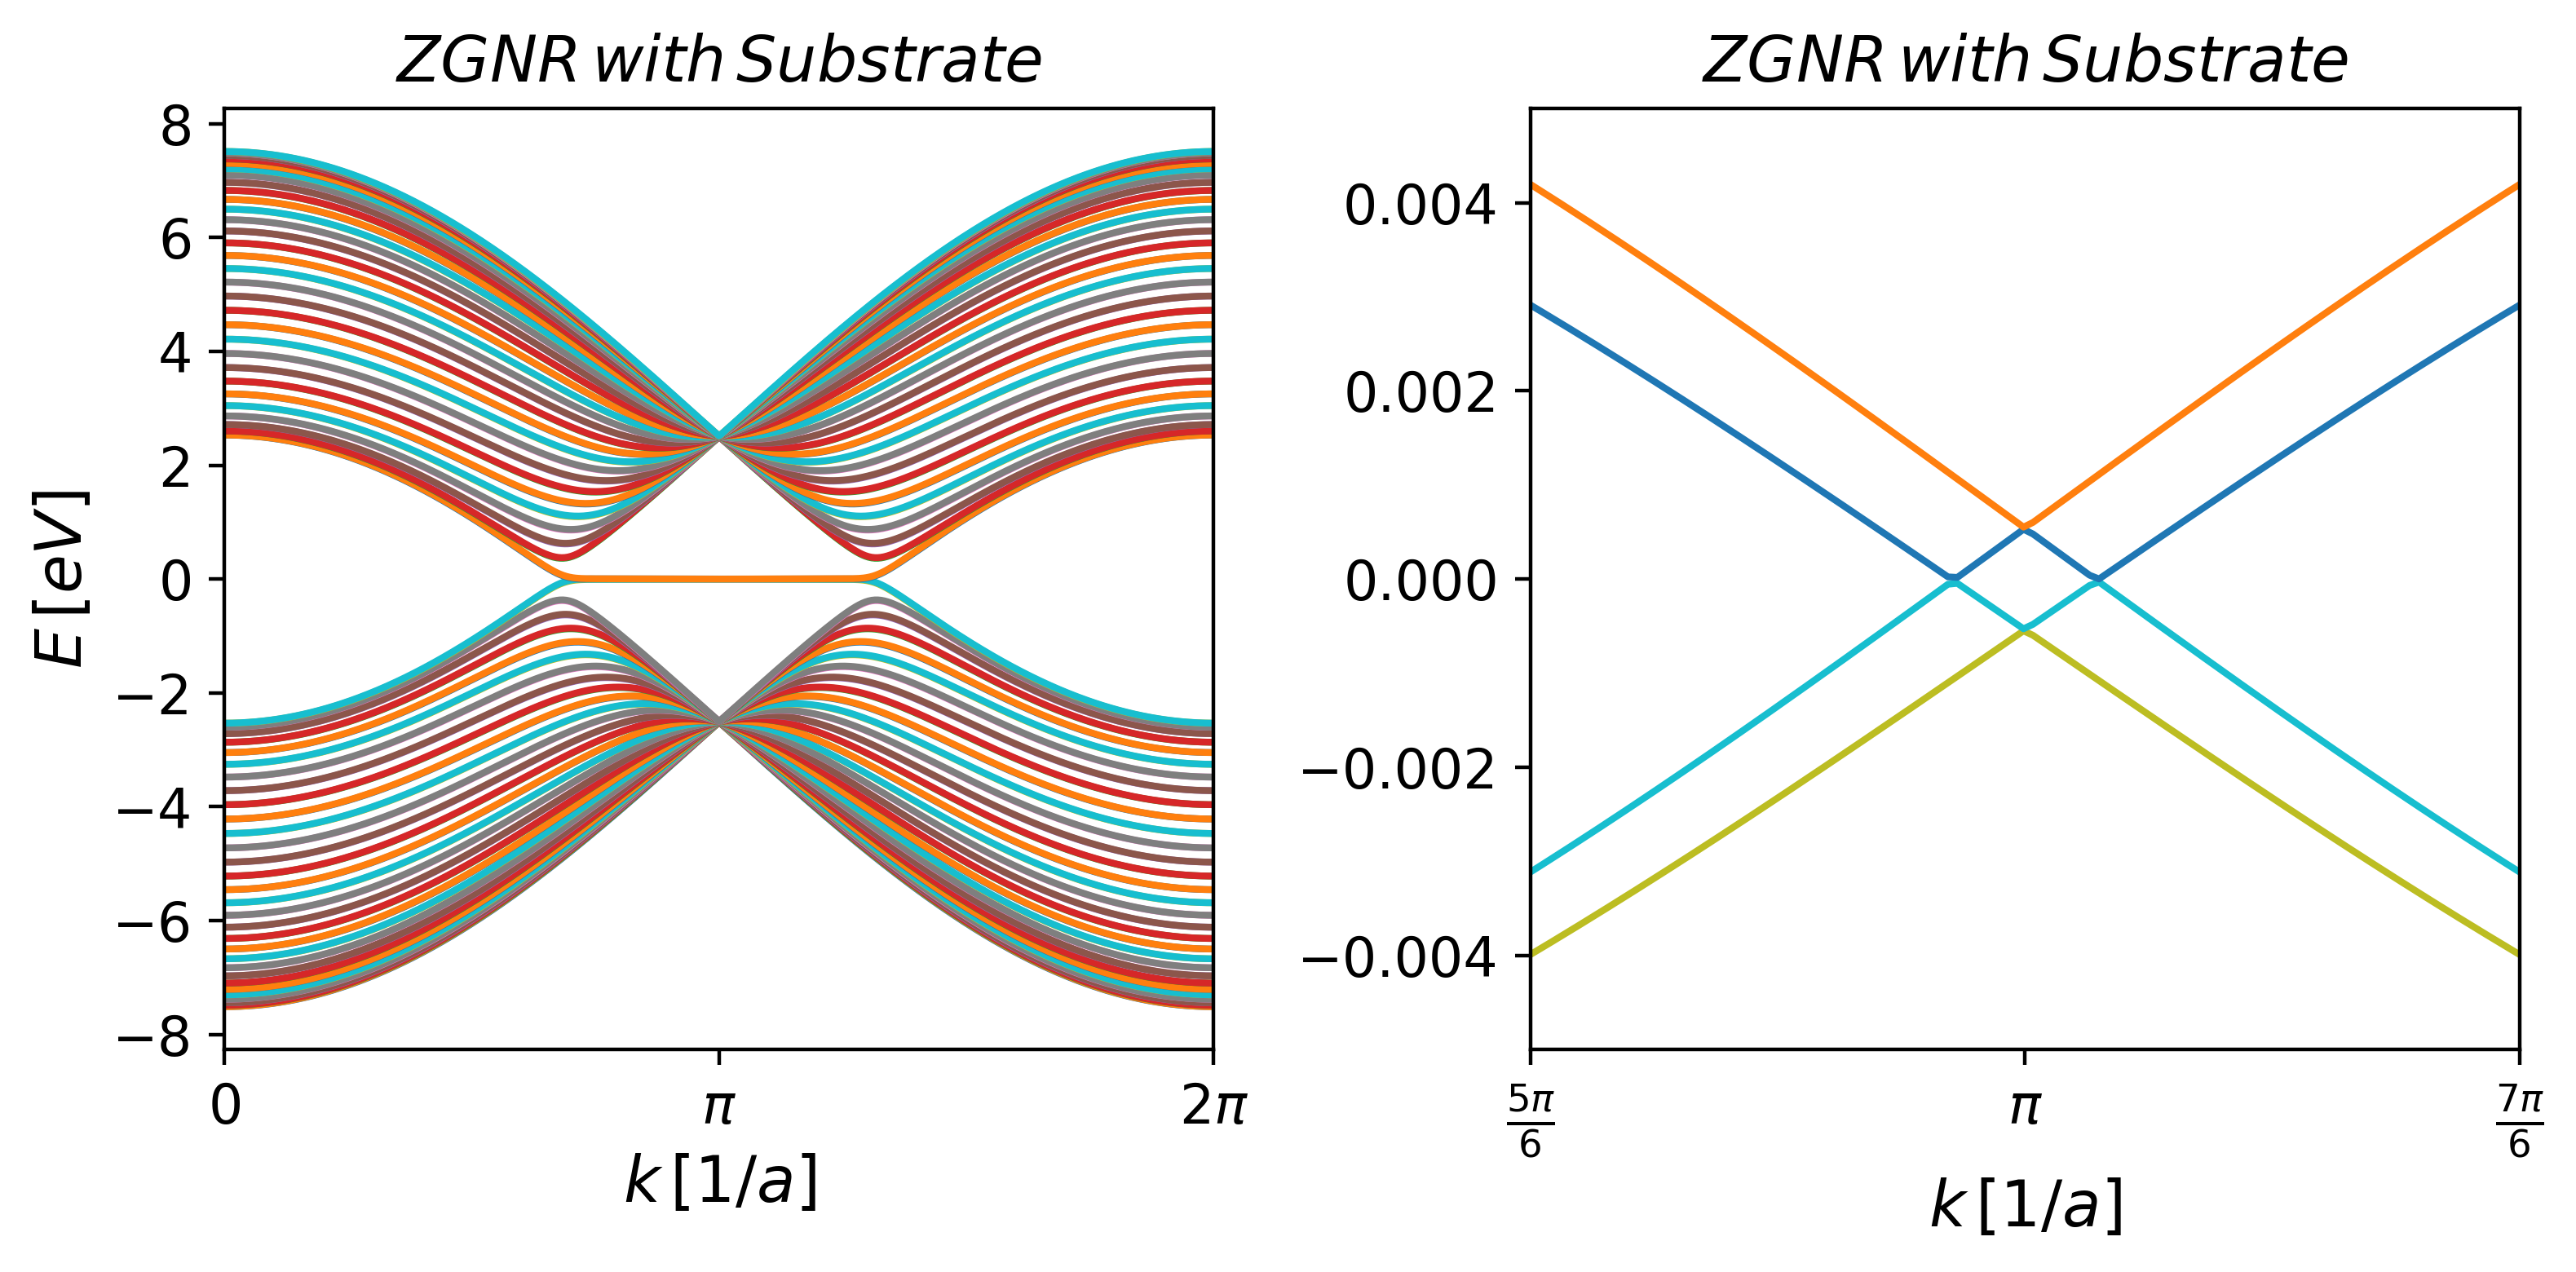

In [186]:
plt.figure(dpi=400,figsize=(8,4))

plt.subplot(121)
axes = plt.gca()
axes.set_title(r'$ZGNR\,with\,Substrate$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel(r'$E\,[eV]$', fontsize=14)
axes.set_xlim([0,2*np.pi])
plt.xticks([0, np.pi, 2*np.pi], ['$0$', '$\pi$', '$2\pi$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(left_lead, momenta=k, dpi=100,  ax=axes);

plt.subplot(122)
axes = plt.gca()
axes.set_title(r'$ZGNR\,with\,Substrate$', fontsize=14)
axes.set_xlabel(r'$k\,[1/a]$', fontsize=14)
axes.set_ylabel('', fontsize=14)
axes.set_ylim([-.005,.005])
axes.set_xlim([5*np.pi/6,7*np.pi/6])
plt.xticks([5*np.pi/6, np.pi, 7*np.pi/6], [r'$\frac{5\pi}{6}$', r'$\pi$', r'$\frac{7\pi}{6}$'], fontsize=12)
plt.yticks(fontsize=12)
kwant.plotter.bands(left_lead, momenta=k, dpi=100,  ax=axes);
plt.tight_layout()
plt.savefig('ZGNR_sub.png')
files.download('ZGNR_sub.png')